# Import Relevant Packages and Custom Helper Functions 

### - Stored in `BoT_Exports/helper.py` to make code cleaner across .ipynb notebooks and .py scripts

In [1]:
from helper import *

# Ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)  # to avoid SettingWithCopyWarning

# Goal: 

- Reseasonalize the Forecast back into actual scale

- Stitch back into:
    - `Level 0: Exports (BOP Basis)`
    
    \

    - `Level 1 (Custom Basis)` : weighted_Sum(Agriculture, Fishery, Forestry, Mining, Manufacturing, Other Exports, Re-Exports 1, Total Exports) 
    - `Level 1 (BOP)` : weighted_Sum(Agriculture, Fishery, Forestry, Mining, Manufacturing, Other Exports, Re-Exports 1, Total Exports) + Coverage_Adjustment\

    \
    
    - `Level 2 (Custom Basis)` : weighted_Sum(weighted_sum_of_components) + Coverage_Adjustment
    - `Level 2 (BOP)` : weighted_Sum(weighted_sum_of_components) + Coverage_Adjustment

    \
    - `Benchmark` (Exponential Moving Average)



In [2]:
names = ['Agriculture', 'Rice', 'Rubber', 'Durian', 'Other_Fruits',
       'Horticultural_products,_n.i.e.', 'Animal_products', 'Fishery',
       'Crustaceans', 'Fish', 'Cuttlefish,_squid,_octopus',
       'Fishery_products,_n.i.e.', 'Forestry', 'Mining', 'Crude_oil',
       'Mineral_products,_n.i.e.', 'Manufacturing',
       'Agro-manufacturing_Products', 'Apparels_and_Textile_Materials',
       'Footware_and_parts', 'Electronics', 'Electrical_Appliances',
       'Metal_&_Steel', 'Automotive',
       'Aircrafts,_ships,_floating_structures,_and_locomotive',
       'Machinery_&_Equipment', 'Jewellery',
       'Chemicals_&_Petro-chemical_Products', 'Petroleum_products',
       'Photographic_&_cinematographic_instruments_&_supplies',
       'Medicinal_and_surgical_equipment_and_supplies',
       'Toiletries_and_cosmetics', 'Furniture_and_parts',
       'Other_Manufacturing_products', 'Other_Exports', 'Re-Exports_1',
       'Total_Exports_(Customs_basis)', 'Coverage_Adjustment',
       'Timing_Adjustment', 'Exports,_f.o.b._(BOP_basis)']

# Level 0: `Exports (BOP Basis)`

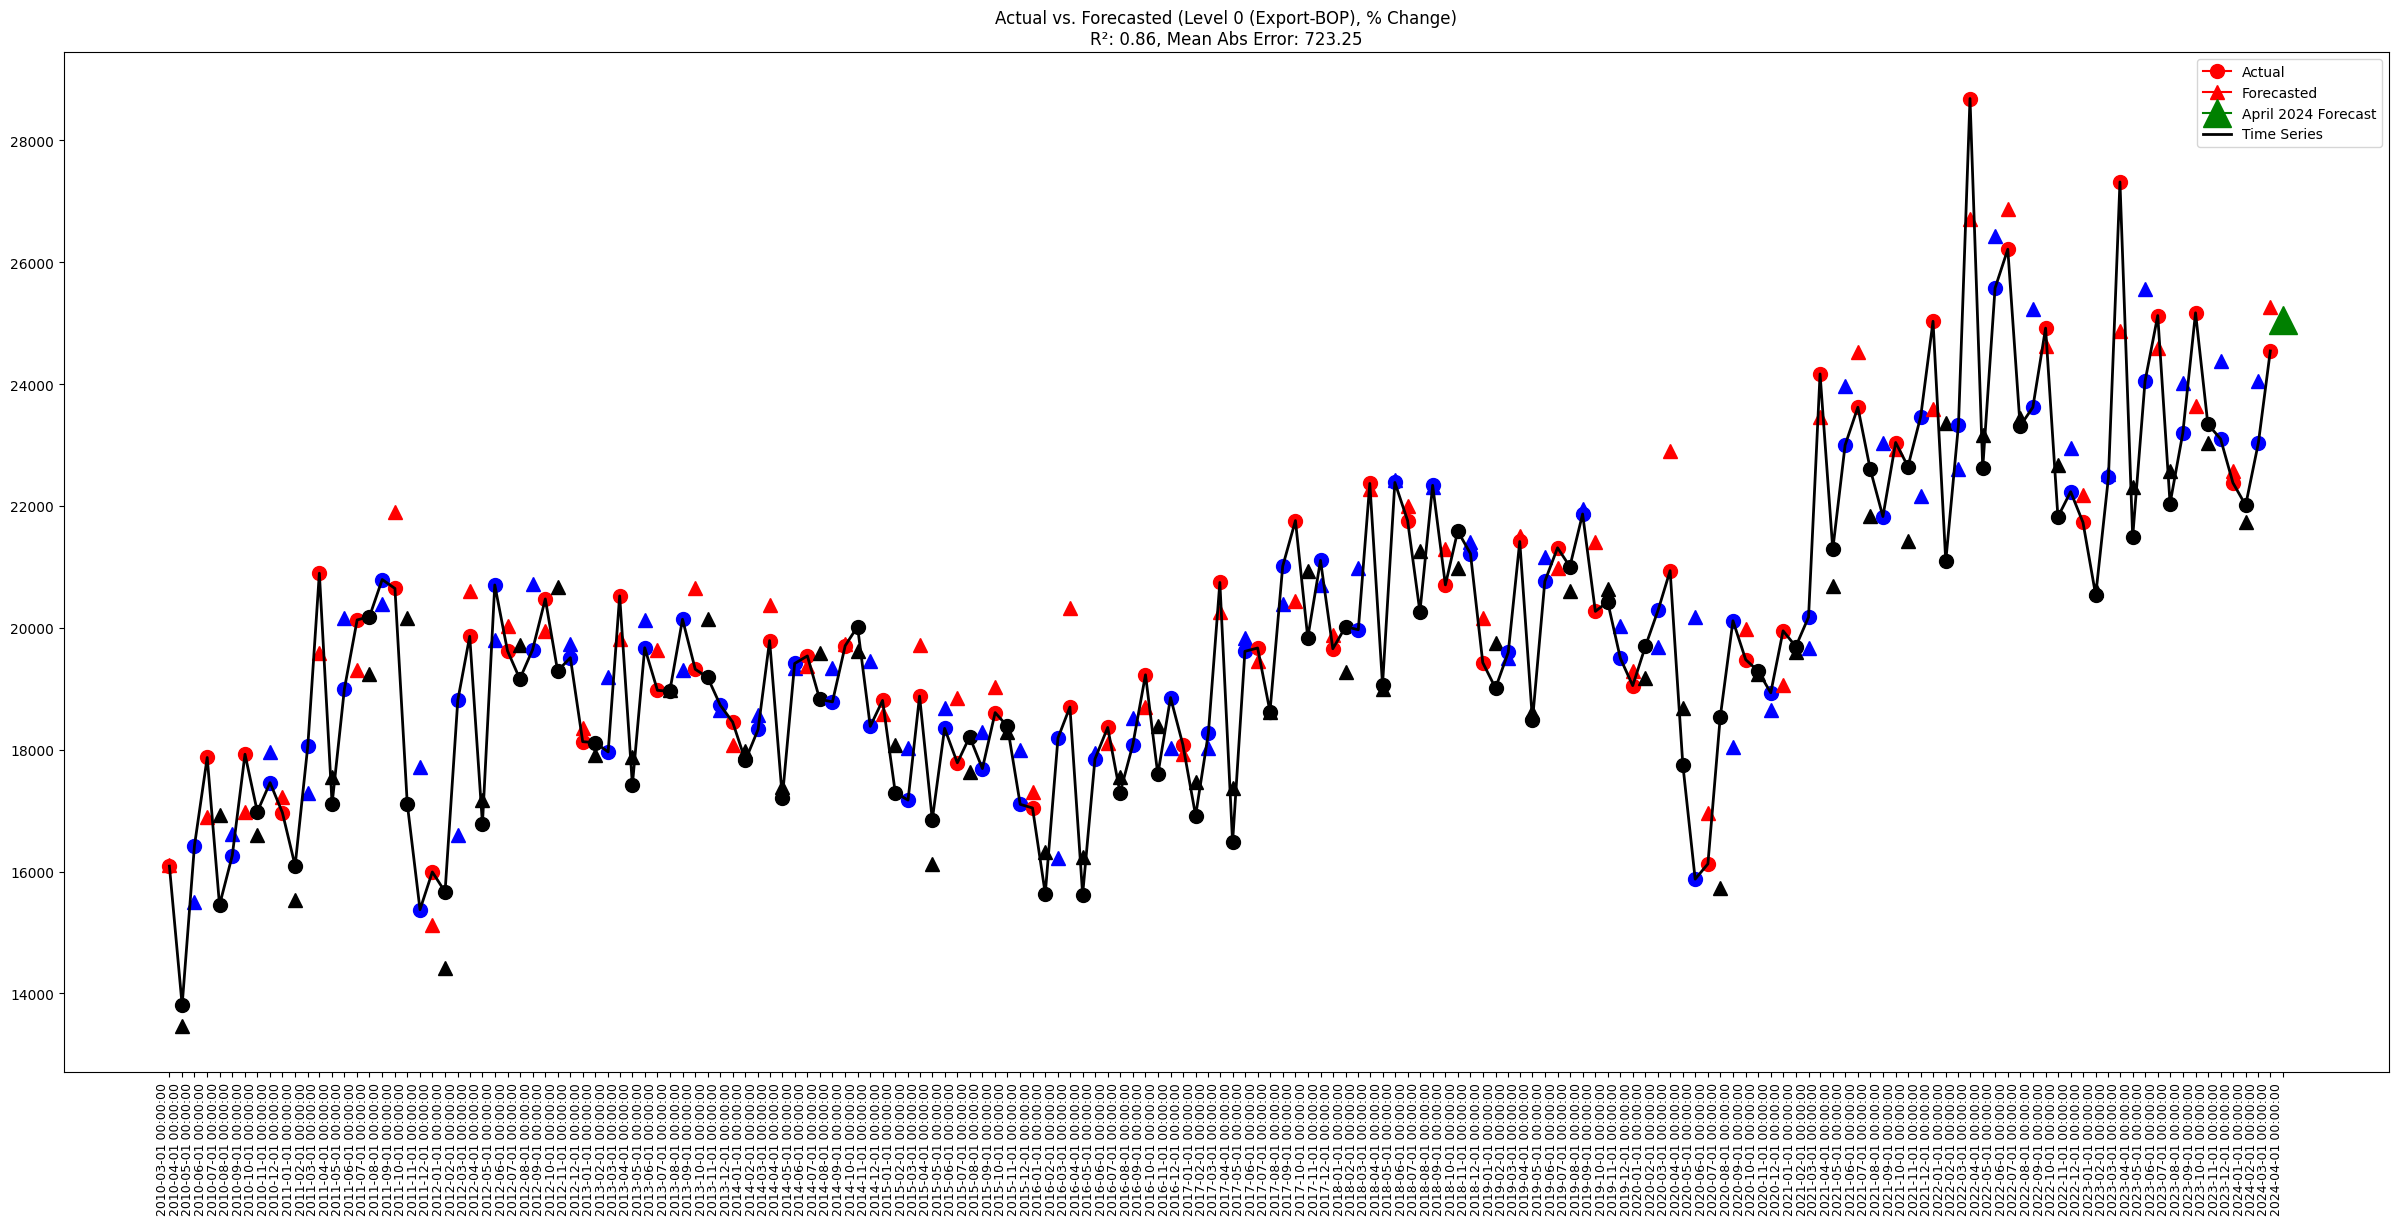

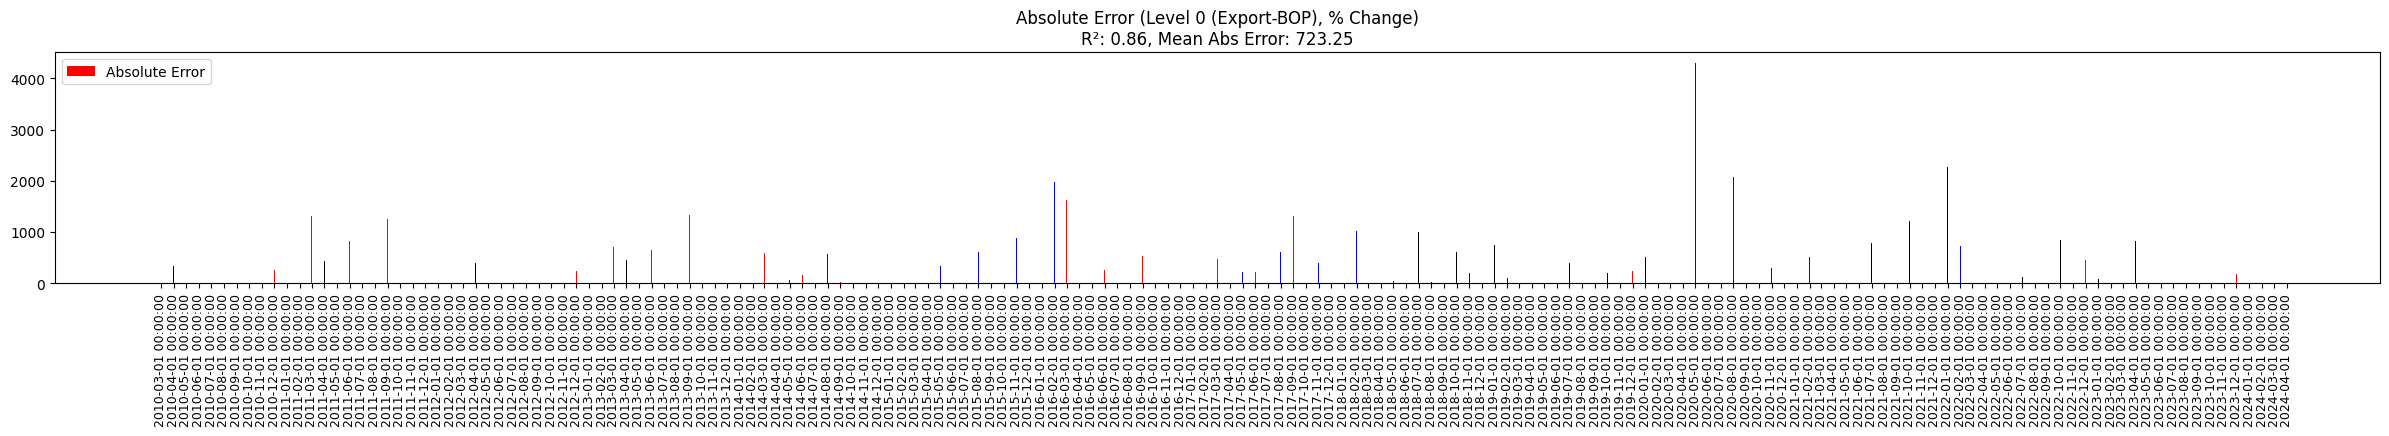

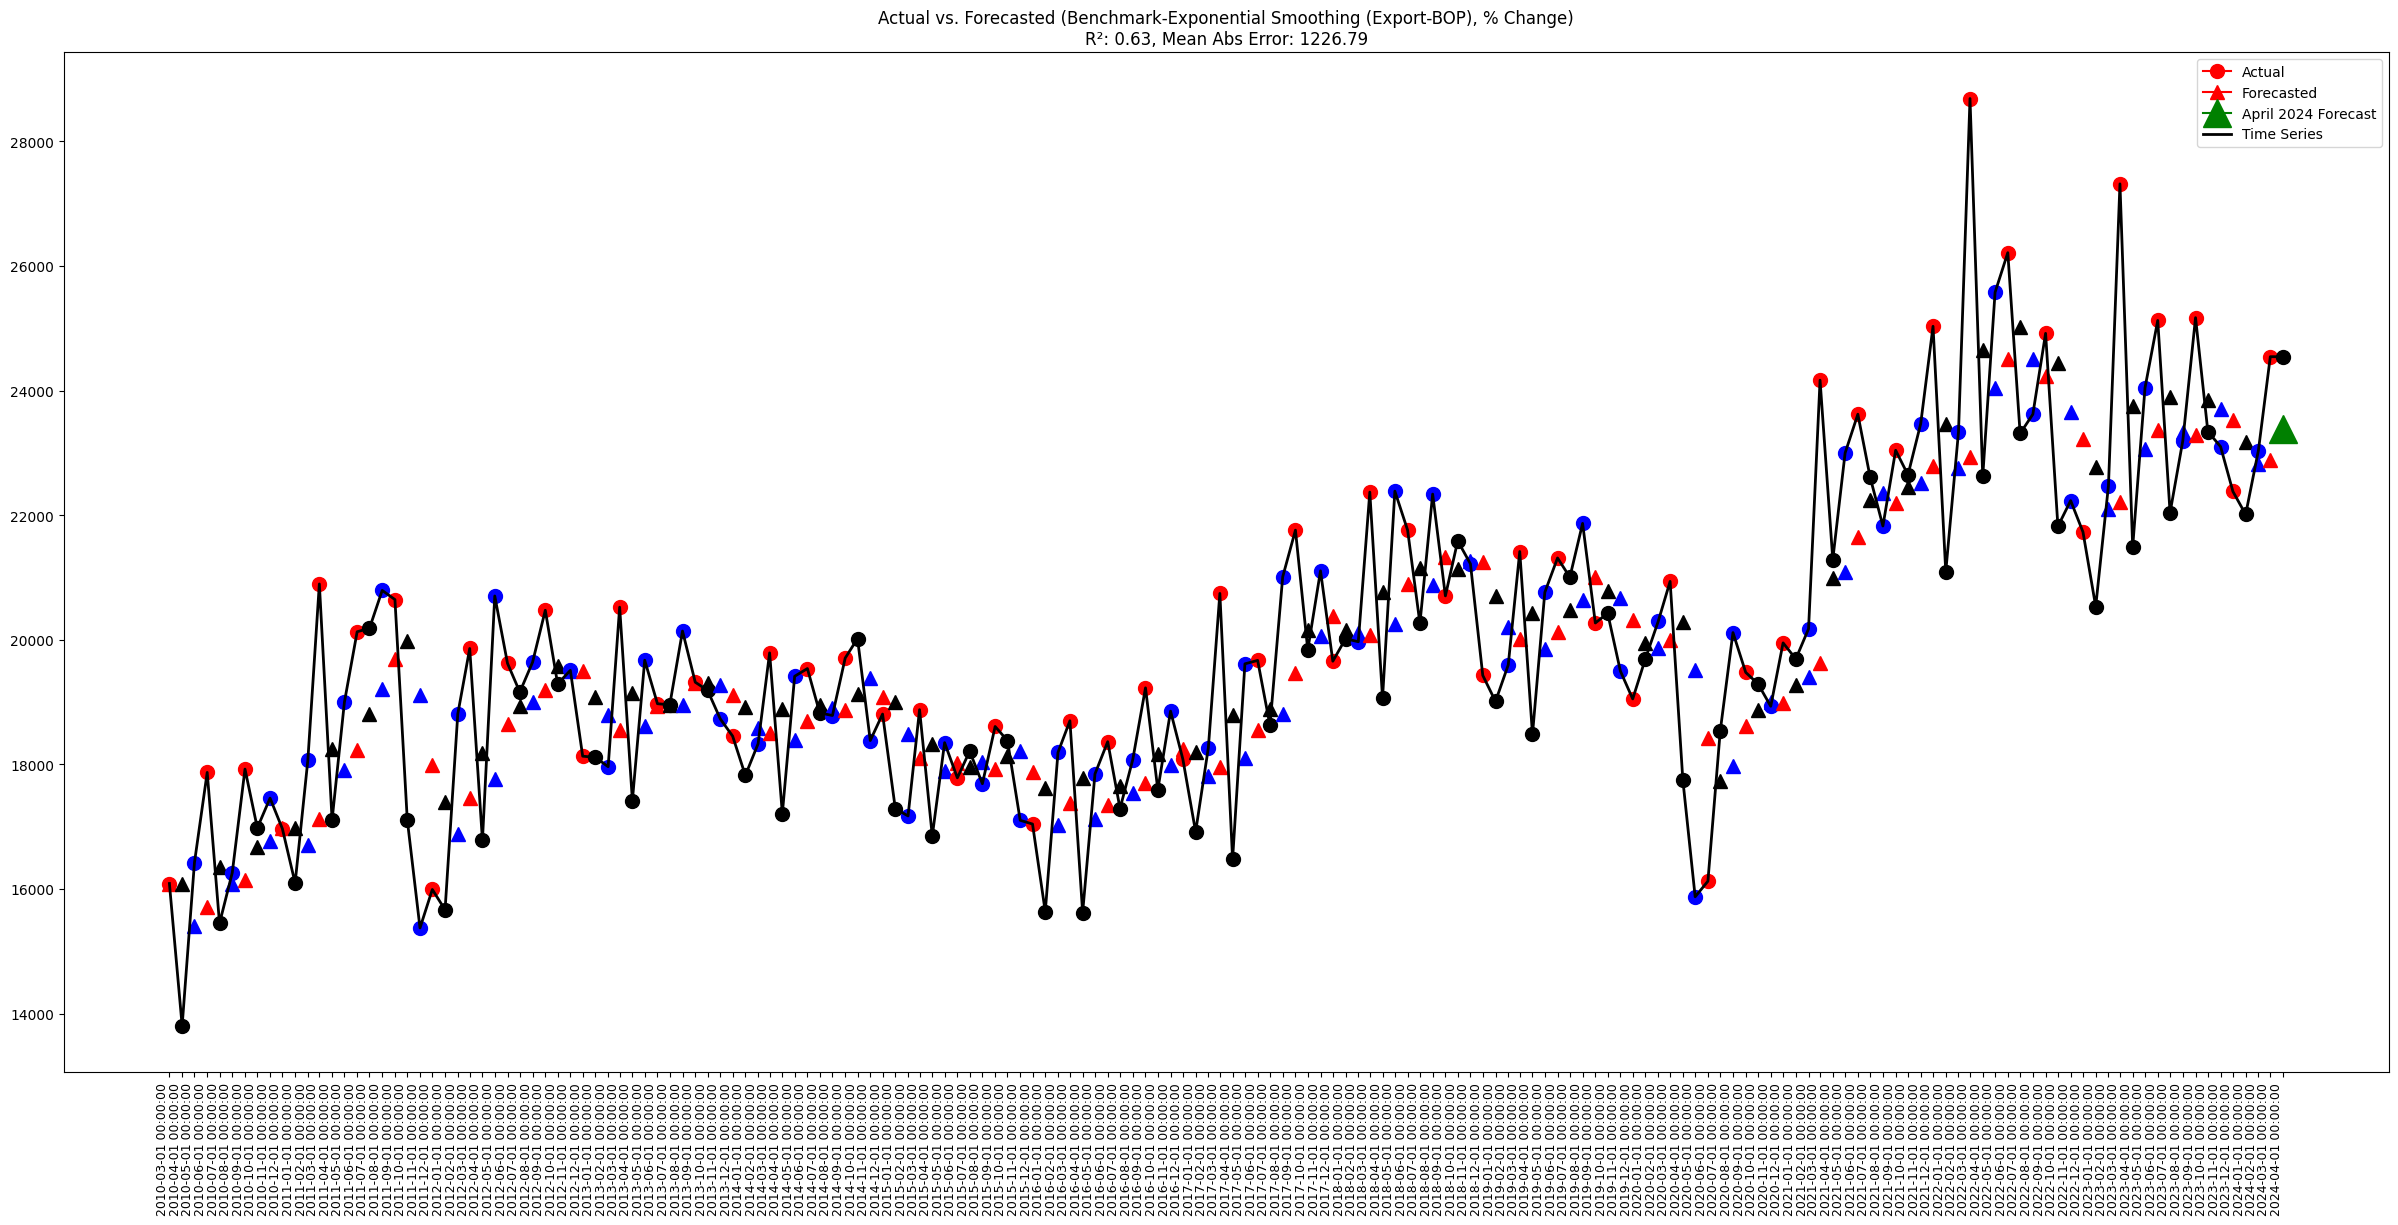

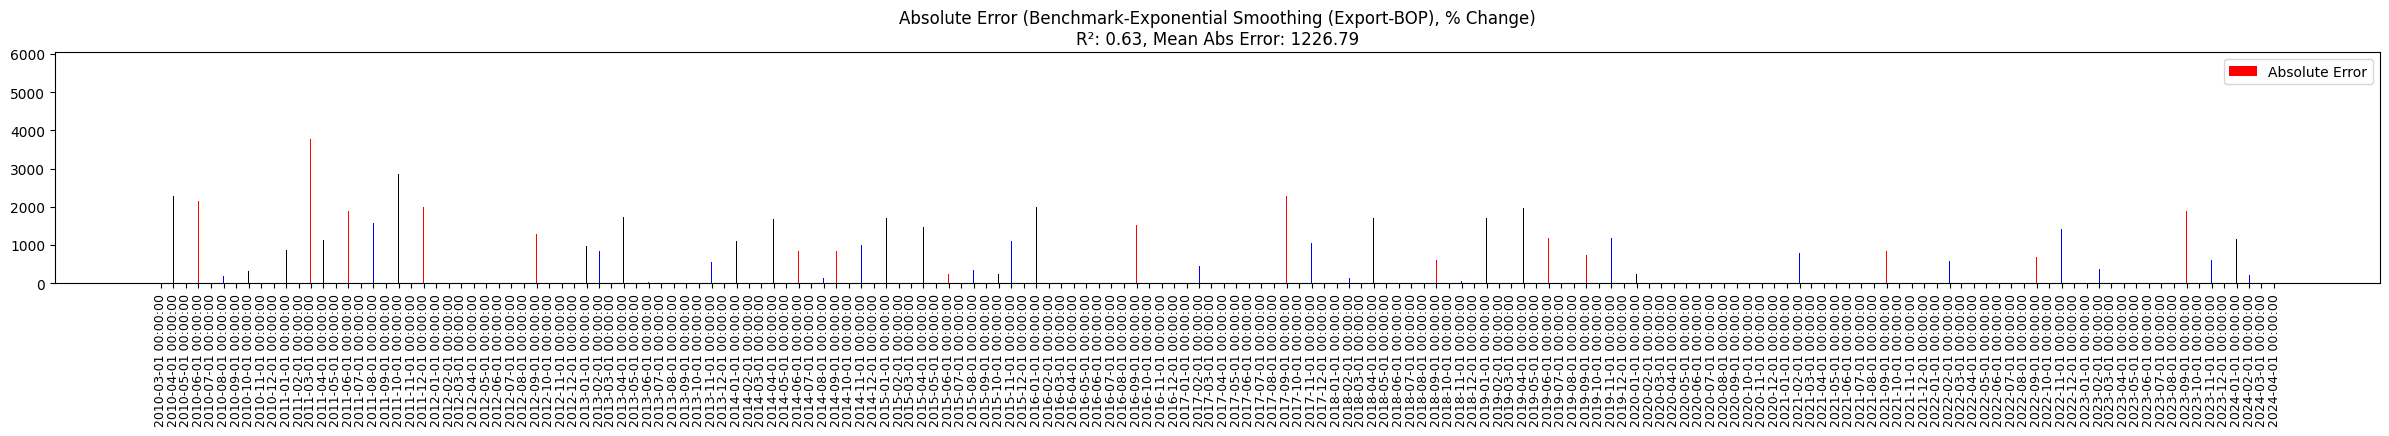

(              actual      forecast        error    abs_error  squared_error  \
 2010-03-01  16088.22  16103.887847   -15.667847    15.667847   2.454814e+02   
 2010-04-01  13804.62  13467.810703   336.809297   336.809297   1.134405e+05   
 2010-05-01  16424.34  15498.108124   926.231876   926.231876   8.579055e+05   
 2010-06-01  17871.67  16894.719461   976.950539   976.950539   9.544324e+05   
 2010-07-01  15447.94  16929.517882 -1481.577882  1481.577882   2.195073e+06   
 ...              ...           ...          ...          ...            ...   
 2023-12-01  22380.30  22567.179468  -186.879468   186.879468   3.492394e+04   
 2024-01-01  22012.20  21730.407784   281.792216   281.792216   7.940685e+04   
 2024-02-01  23036.45  24052.342575 -1015.892575  1015.892575   1.032038e+06   
 2024-03-01  24543.84  25259.073457  -715.233457   715.233457   5.115589e+05   
 2024-04-01       NaN  25058.037346          NaN          NaN            NaN   
 
             abs_percentage_error  
 2

In [3]:
## Level 0: BOP
name = "Exports,_f.o.b._(BOP_basis)"
# name = "Re-Exports_1"
# name = "Total_Exports_(Customs_basis)"


process_forecast_accuracy(name=name,
                          plot_show=True,
                          col_name="Level 0 (Export-BOP)",)

# Level 1 (Custom Basis) : weighted_Sum(Agriculture, Fishery, Forestry, Mining, Manufacturing, Other Exports, Re-Exports 1, Total Exports) 

In [4]:
mapper = pd.read_pickle("data/cleaned/MAP_exports_FirstAnalysis.pkl")
mapper

,Agriculture,Fishery,Forestry,Mining,Manufacturing,Other_Exports,Re-Exports_1,Total_Exports_(Customs_basis)
0,Rice,Crustaceans,NaN,Crude_oil,Agro-manufacturing_Products,NaN,NaN,Agriculture
1,Rubber,Fish,NaN,"Mineral_products,_n.i.e.",Apparels_and_Textile_Materials,NaN,NaN,Fishery
2,Durian,"Cuttlefish,_squid,_octopus",NaN,NaN,Footware_and_parts,NaN,NaN,Forestry
3,Other_Fruits,"Fishery_products,_n.i.e.",NaN,NaN,Electronics,NaN,NaN,Mining
4,"Horticultural_products,_n.i.e.",NaN,NaN,NaN,Electrical_Appliances,NaN,NaN,Manufacturing
5,Animal_products,NaN,NaN,NaN,Metal_&_Steel,NaN,NaN,Other_Exports
6,NaN,NaN,NaN,NaN,Automotive,NaN,NaN,Re-Exports_1
7,NaN,NaN,NaN,NaN,"Aircrafts,_ships,_floating_structures,_and_loc...",NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,Machinery_&_Equipment,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,Jewellery,NaN,NaN,NaN


In [5]:
map_l1 = mapper.iloc[:,[-1]].dropna()
name = map_l1.columns[0]
display(name)
display(map_l1)

constituents = map_l1[name].to_list()
display(constituents)

'Total_Exports_(Customs_basis)'

,Total_Exports_(Customs_basis)
0,Agriculture
1,Fishery
2,Forestry
3,Mining
4,Manufacturing
5,Other_Exports
6,Re-Exports_1


['Agriculture',
 'Fishery',
 'Forestry',
 'Mining',
 'Manufacturing',
 'Other_Exports',
 'Re-Exports_1']

In [6]:
with open("data/cleaned/forecasted_weights/dict_R2_cap_extreme_values.pkl", "rb") as f:
    weights_r2 = pickle.load(f)[name]   

display(weights_r2)

max_row_names = weights_r2.idxmax()

weight_technique_name_map = {"Lag-1": "Lag_1_",
                             "Exp Smooth": "Exp_Smooth_",
                             "DCR": "DCR_"}
REVERSE_weight_technique_name_map = {v: k for k, v in weight_technique_name_map.items()}

max_row_names = max_row_names.map(weight_technique_name_map)
display(max_row_names)

,Agriculture,Fishery,Forestry,Mining,Manufacturing,Other_Exports,Re-Exports_1
DCR,0.375374,0.163061,0.563713,0.252655,0.083092,0.004026,0.160536
Exp Smooth,0.454942,0.206607,0.692899,0.152601,0.052322,0.058823,0.204841
Lag-1,0.472380,0.539492,0.595167,0.261575,0.035167,-0.208714,-0.142726


Agriculture           Lag_1_
Fishery               Lag_1_
Forestry         Exp_Smooth_
Mining                Lag_1_
Manufacturing           DCR_
Other_Exports    Exp_Smooth_
Re-Exports_1     Exp_Smooth_
dtype: object

In [7]:
forecast_df_original_dcr = pd.read_pickle(f"data/cleaned/forecasted_weights/DCR_{name}.pkl")
forecast_df_original_exp_smooth = pd.read_pickle(f"data/cleaned/forecasted_weights/Exp_Smooth_{name}.pkl")
forecast_df_original_lag_1 = pd.read_pickle(f"data/cleaned/forecasted_weights/Lag_1_{name}.pkl")

# Convert the PeriodDtype index to timestamps
forecast_df_original_dcr.index = forecast_df_original_dcr.index.to_timestamp()
forecast_df_original_exp_smooth.index = forecast_df_original_exp_smooth.index.to_timestamp()
forecast_df_original_lag_1.index = forecast_df_original_lag_1.index.to_timestamp()

#convert pd.to_datetime 
forecast_df_original_dcr.index = pd.to_datetime(forecast_df_original_dcr.index)
forecast_df_original_exp_smooth.index = pd.to_datetime(forecast_df_original_exp_smooth.index)
forecast_df_original_lag_1.index = pd.to_datetime(forecast_df_original_lag_1.index)


display("forecast_df_original_dcr")
display(forecast_df_original_dcr)
display("forecast_df_original_exp_smooth")
display(forecast_df_original_exp_smooth)
display("forecast_df_original_lag_1")
display(forecast_df_original_lag_1)

'forecast_df_original_dcr'

,Agriculture,Fishery,Forestry,Mining,Manufacturing,Other_Exports,Re-Exports_1
2010-01-01,0.059828,0.009615,0.003298,0.006922,0.910358,0.009669,0.000311
2010-02-01,0.058623,0.009421,0.004346,0.006782,0.915440,0.005082,0.000305
2010-03-01,0.058245,0.009360,0.004778,0.006738,0.909528,0.011048,0.000303
2010-04-01,0.057699,0.009273,0.004144,0.006675,0.901009,0.020900,0.000300
2010-05-01,0.055815,0.008970,0.004752,0.007224,0.871590,0.020900,0.000290
...,...,...,...,...,...,...,...
2023-12-01,0.072646,0.005449,0.006575,0.003428,0.895598,0.015327,0.000977
2024-01-01,0.069014,0.005029,0.006548,0.003815,0.894287,0.020184,0.001122
2024-02-01,0.062080,0.004749,0.006573,0.003425,0.898328,0.023756,0.001090
2024-03-01,0.056775,0.004636,0.007422,0.003173,0.904796,0.022517,0.000680


'forecast_df_original_exp_smooth'

,Agriculture,Fishery,Forestry,Mining,Manufacturing,Other_Exports,Re-Exports_1
2010-01-01,0.072152,0.009877,0.003401,0.008240,0.888141,0.017884,0.000305
2010-02-01,0.071383,0.009771,0.003582,0.008152,0.878674,0.028135,0.000302
2010-03-01,0.072388,0.009909,0.005029,0.008085,0.891040,0.013245,0.000306
2010-04-01,0.065901,0.009021,0.003951,0.007360,0.899407,0.014082,0.000278
2010-05-01,0.065163,0.008920,0.004408,0.007496,0.889335,0.024403,0.000275
...,...,...,...,...,...,...,...
2023-12-01,0.071353,0.005306,0.006119,0.003229,0.897928,0.015220,0.000846
2024-01-01,0.070010,0.004794,0.006428,0.003295,0.896379,0.018102,0.000993
2024-02-01,0.062975,0.004607,0.006817,0.003524,0.896797,0.024093,0.001186
2024-03-01,0.057785,0.004451,0.007534,0.003335,0.897296,0.028726,0.000873


'forecast_df_original_lag_1'

,Agriculture,Fishery,Forestry,Mining,Manufacturing,Other_Exports,Re-Exports_1
2010-01-01,0.077335,0.008343,0.003512,0.005070,0.894888,0.009327,0.001525
2010-02-01,0.077689,0.008381,0.003925,0.005093,0.898979,0.004400,0.001532
2010-03-01,0.077069,0.008315,0.004622,0.005945,0.891811,0.010718,0.001520
2010-04-01,0.086701,0.009354,0.004224,0.008902,0.871099,0.018011,0.001710
2010-05-01,0.076795,0.008415,0.004116,0.006699,0.886231,0.016205,0.001539
...,...,...,...,...,...,...,...
2023-12-01,0.069067,0.005125,0.005789,0.002551,0.902586,0.013858,0.001024
2024-01-01,0.063152,0.004797,0.006714,0.003367,0.899579,0.021684,0.000708
2024-02-01,0.061800,0.005299,0.006777,0.003502,0.892903,0.028562,0.001157
2024-03-01,0.056838,0.004857,0.007693,0.004239,0.887934,0.037921,0.000519


,actual,forecast,error,abs_error,squared_error,abs_percentage_error
2010-03-01,16142.69,13690.545677,2452.144323,2452.144323,6.013012e+06,0.151904
2010-04-01,13964.05,10657.468361,3306.581639,3306.581639,1.093348e+07,0.236792
2010-05-01,16447.98,11256.543127,5191.436873,5191.436873,2.695102e+07,0.315628
2010-06-01,17942.68,11910.646263,6032.033737,6032.033737,3.638543e+07,0.336184
2010-07-01,15456.20,12902.011271,2554.188729,2554.188729,6.523880e+06,0.165253
...,...,...,...,...,...,...
2023-12-01,22791.55,17836.941877,4954.608123,4954.608123,2.454814e+07,0.217388
2024-01-01,22649.88,17936.698094,4713.181906,4713.181906,2.221408e+07,0.208089
2024-02-01,23384.86,20162.683337,3222.176663,3222.176663,1.038242e+07,0.137789
2024-03-01,24960.55,21038.438273,3922.111727,3922.111727,1.538296e+07,0.157132


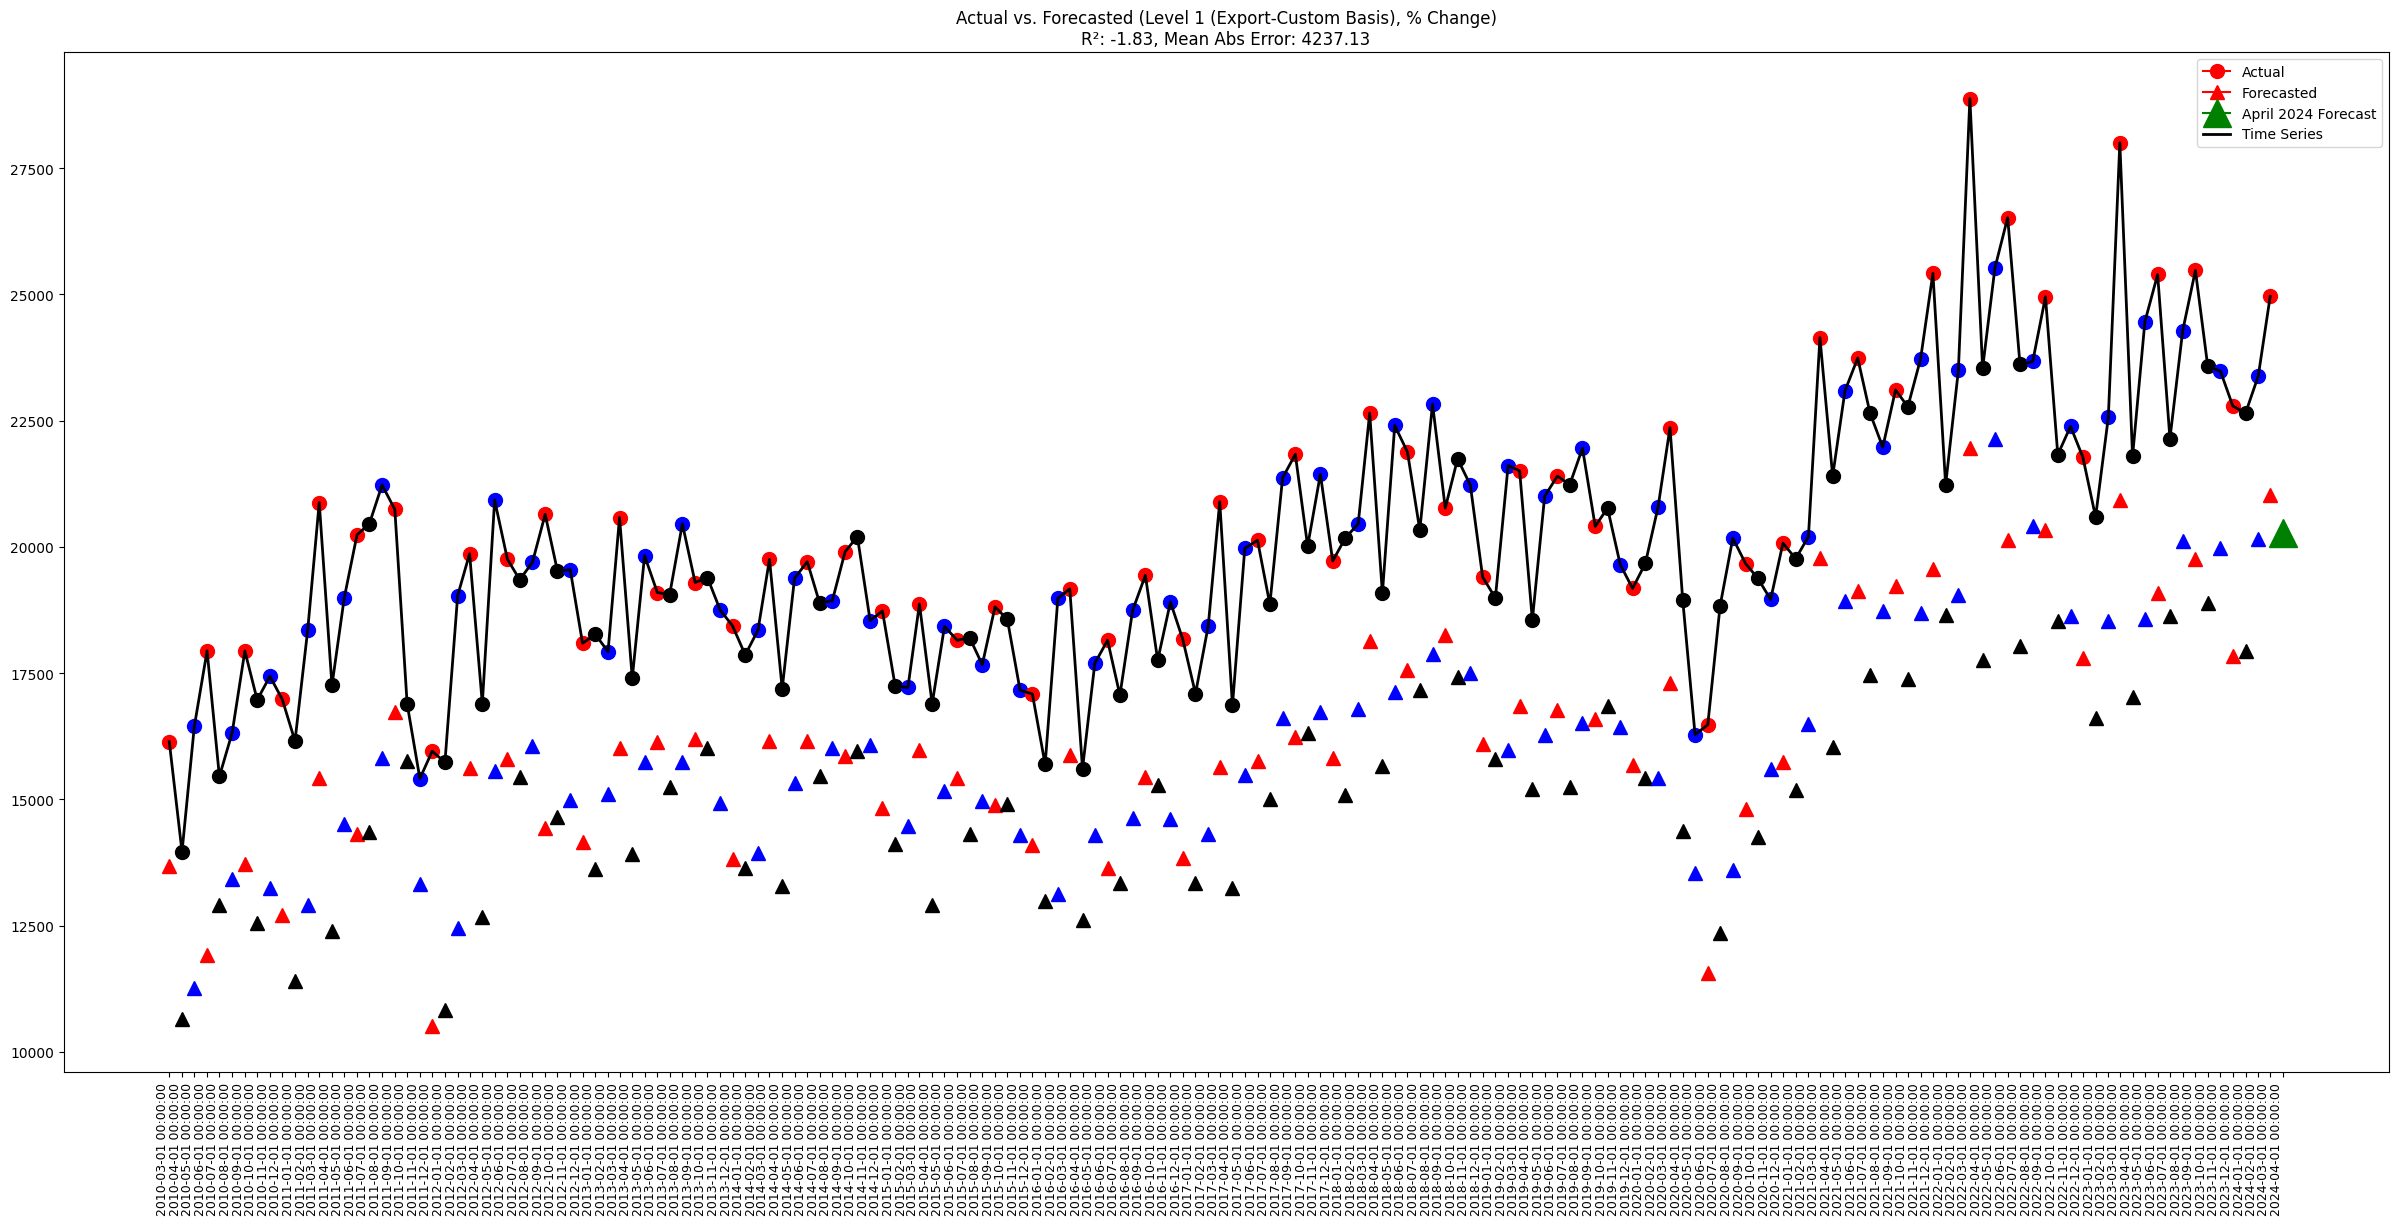

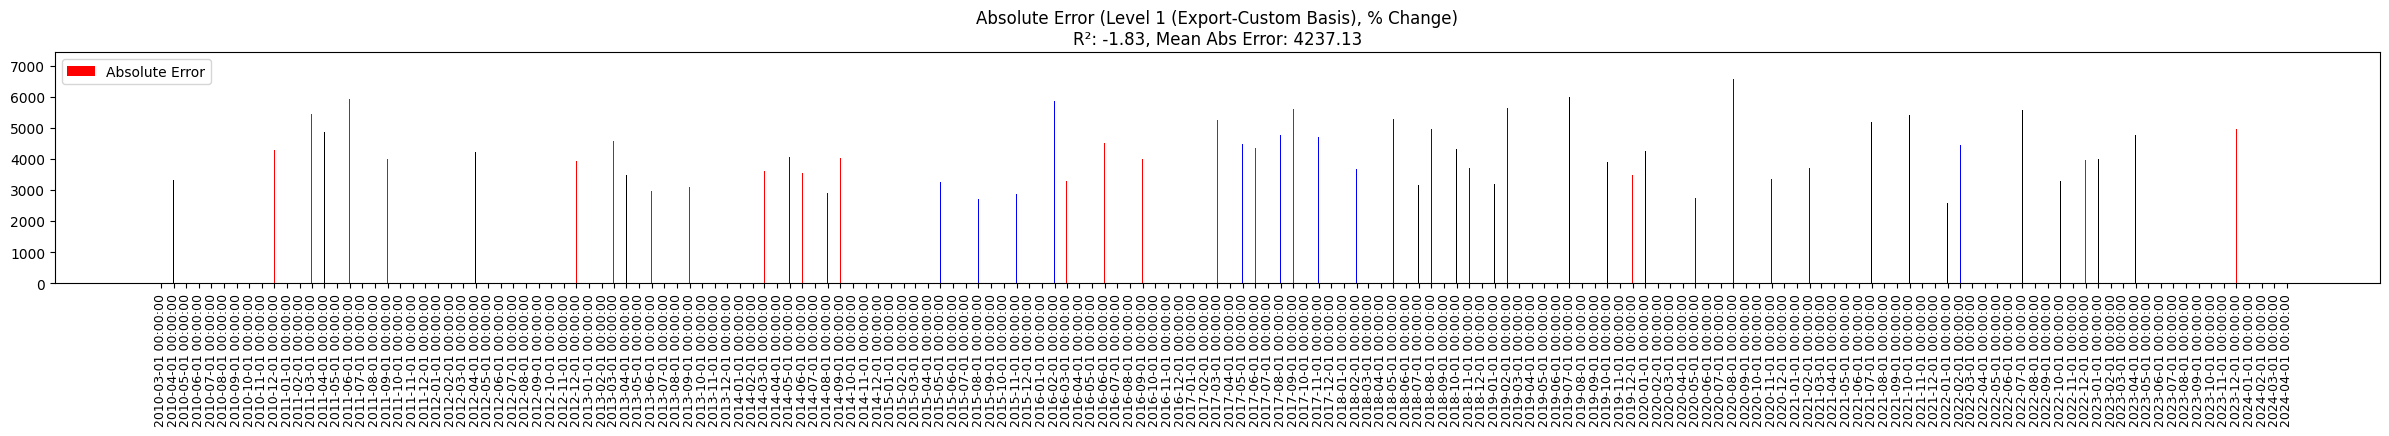

In [8]:
#weighted sum
df_weighted = pd.DataFrame()

for i in constituents:
    #get weights
    best_r2 = max_row_names[i]
    w = convert_period_index_to_datetime(pd.read_pickle(f"data/cleaned/forecasted_weights/{best_r2}{name}.pkl")[i])
    #get forecast returns
    forecast, benchmark = process_forecast_accuracy(name=i,
                                                    plot_show=False)
    forecast = forecast["forecast"]
    
    #reindex to the shorter length
    if len(w) > len(forecast):
        w = w.reindex(forecast.index)
    else:
        forecast = forecast.reindex(w.index)
    
    df_weighted[i] = forecast * w
    
#drop the na rows
df_weighted = df_weighted.dropna().sum(axis=1).dropna()

df_actual, _ = process_forecast_accuracy(name=name,
                                        plot_show=False)
df_actual = df_actual["actual"]

# reindex to the shorter length
if len(df_weighted) > len(df_actual):
    df_weighted = df_weighted.reindex(df_actual.index)
else:
    df_actual = df_actual.reindex(df_weighted.index)

df_accuracy = calculate_accuracy_metrics(actual=df_actual,
                                         forecast=df_weighted)
display(df_accuracy)

plot_actual_vs_forecast(df_accuracy=df_accuracy, col_name="Level 1 (Export-Custom Basis)")

# The above result from the stiched forecast looks bad, however, I can see a trend which looks like a speculative linear combination of the actual. This means that Linear combination Optimisation can be done over a rolling scale to optimise (minimize the MAE). In the future, I will implement a rolling optimisation but for the current stage, the computation is too expensive given the deadline, and the optimisation here with be a rough representation and experiment

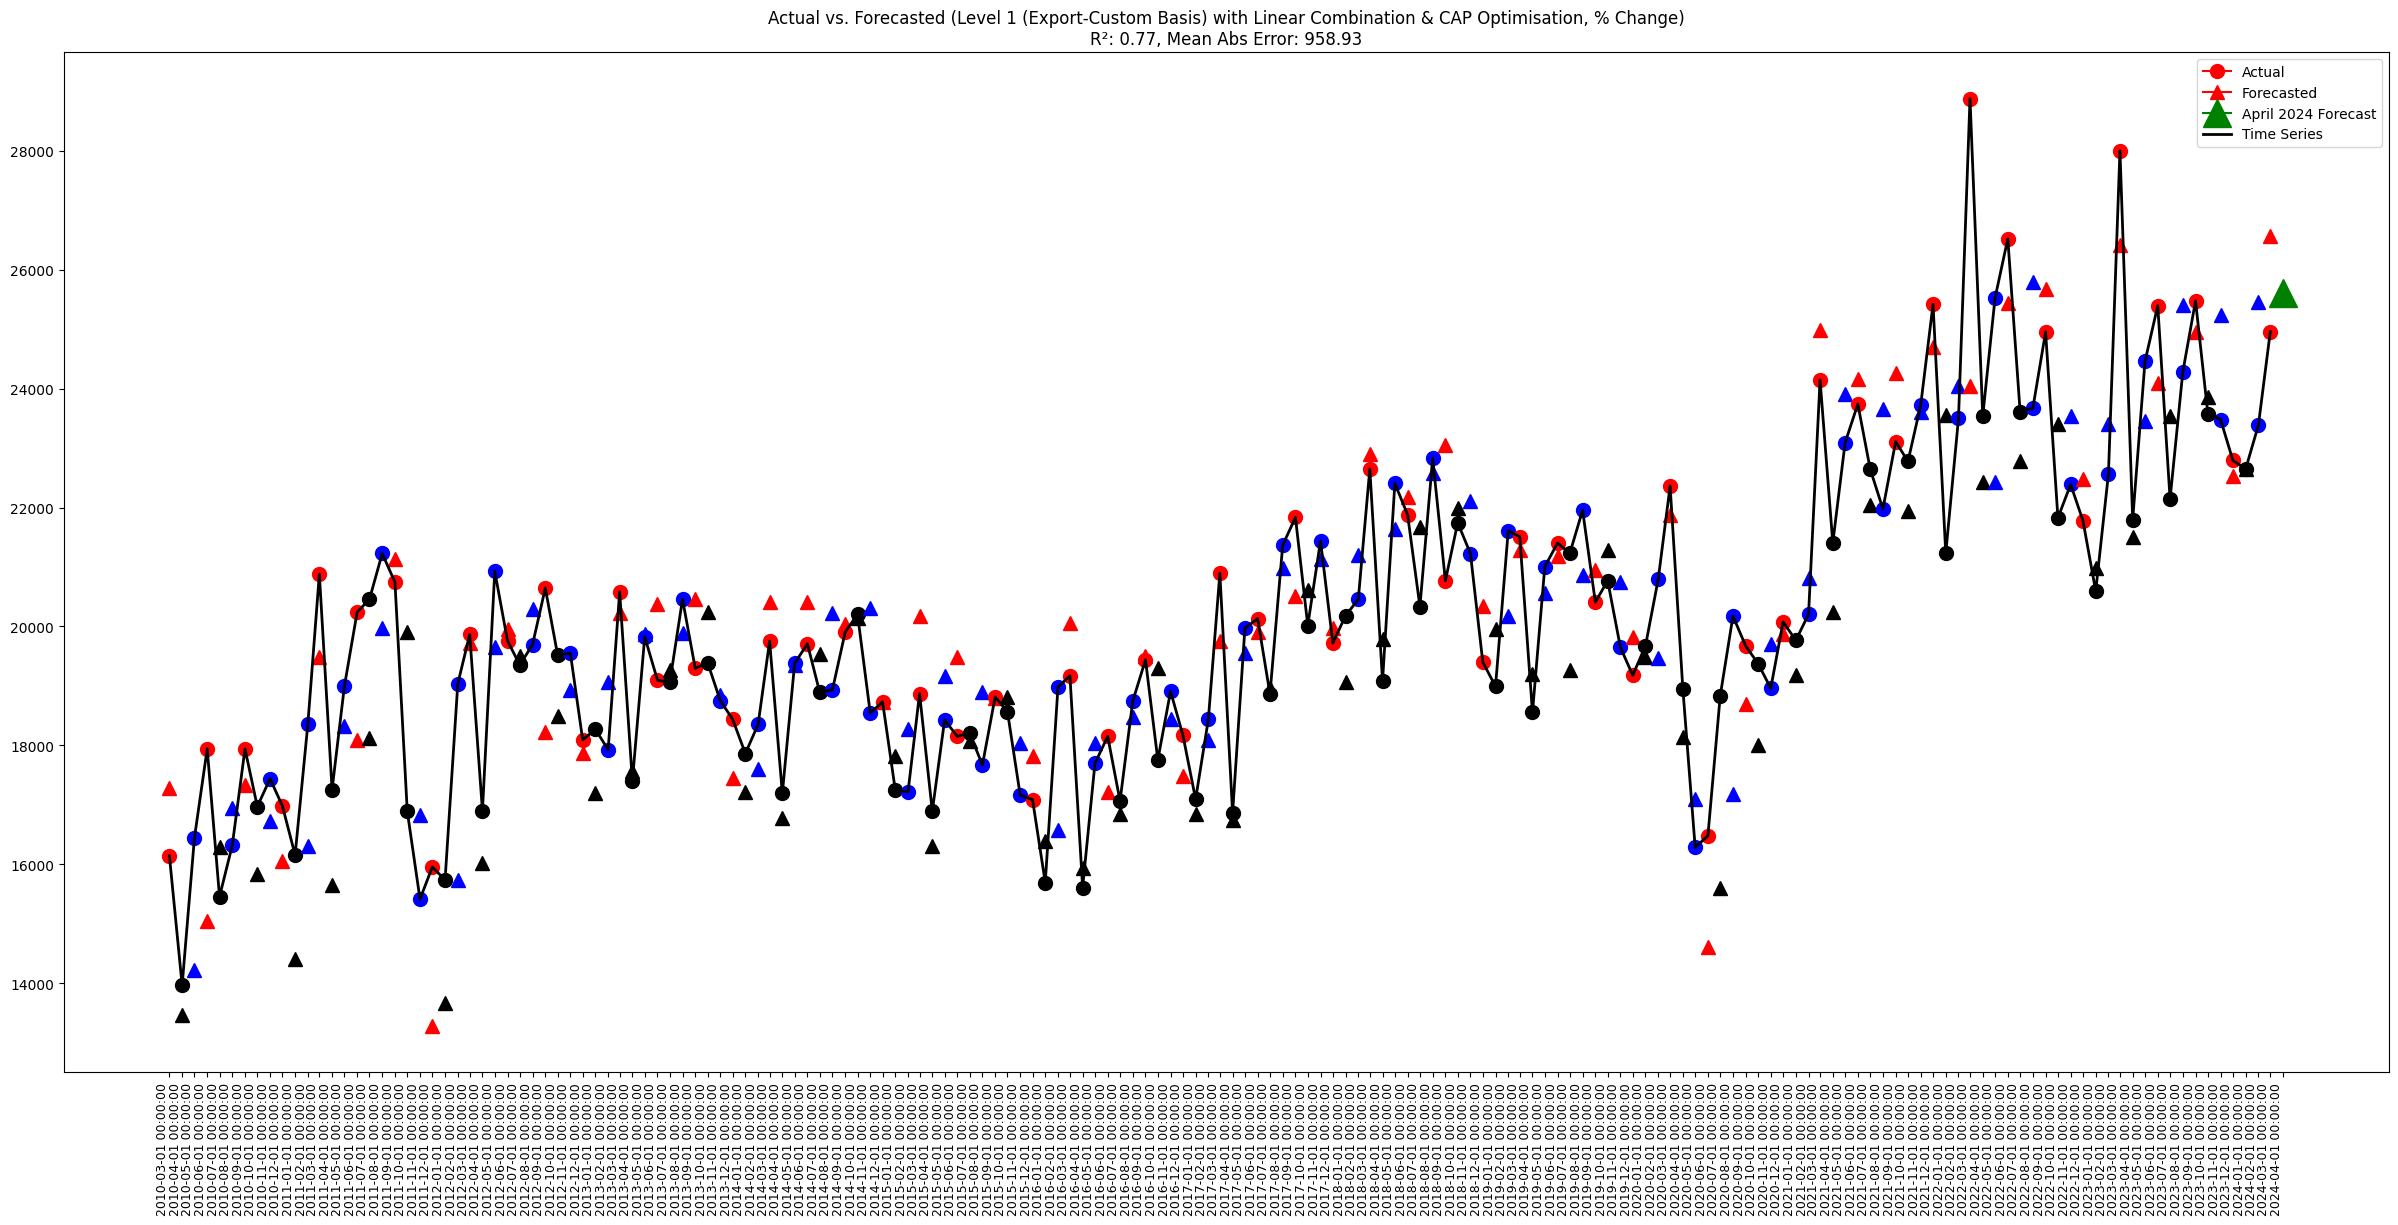

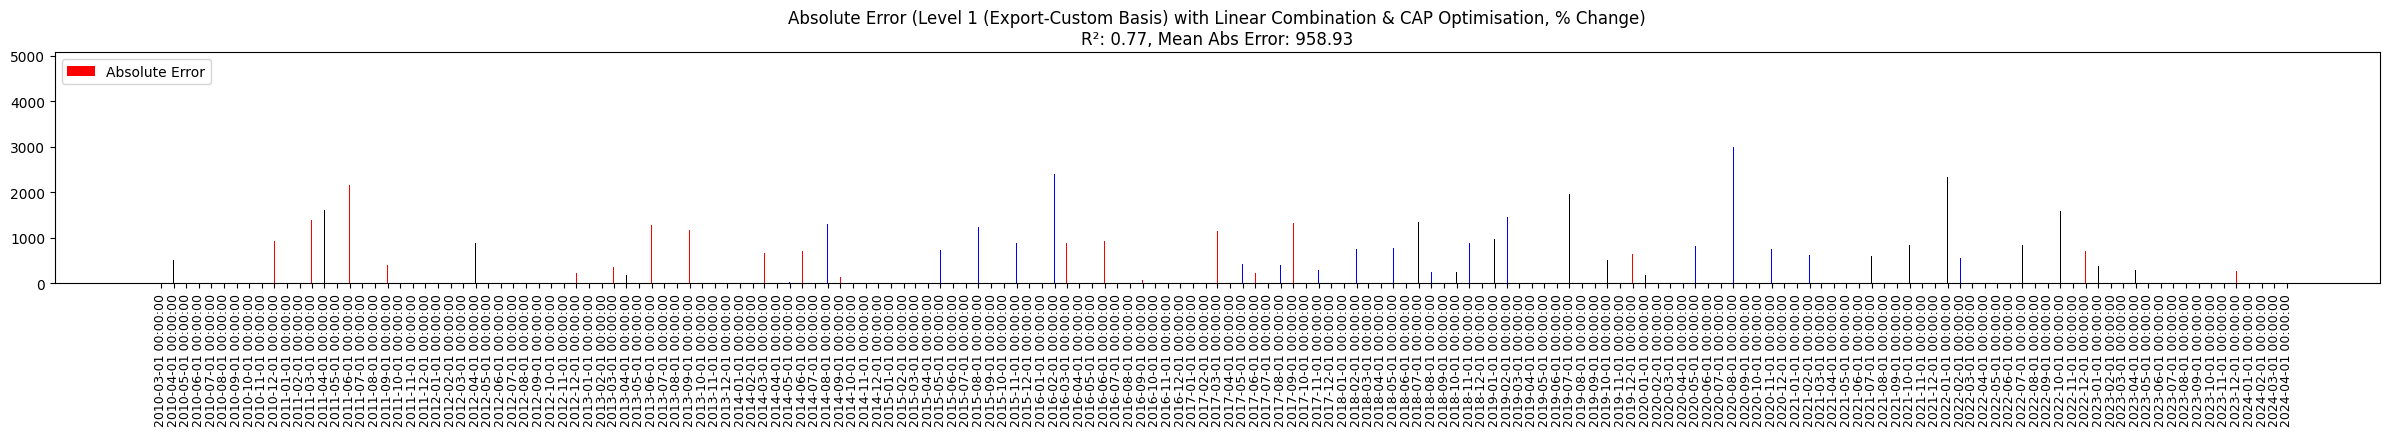

,actual,forecast,error,abs_error,squared_error,abs_percentage_error
2010-03-01,16142.69,17289.544762,-1146.854762,1146.854762,1.315276e+06,0.071045
2010-04-01,13964.05,13459.294910,504.755090,504.755090,2.547777e+05,0.036147
2010-05-01,16447.98,14215.822289,2232.157711,2232.157711,4.982528e+06,0.135710
2010-06-01,17942.68,15041.840942,2900.839058,2900.839058,8.414867e+06,0.161673
2010-07-01,15456.20,16293.762763,-837.562763,837.562763,7.015114e+05,0.054189
...,...,...,...,...,...,...
2023-12-01,22791.55,22525.722997,265.827003,265.827003,7.066400e+04,0.011663
2024-01-01,22649.88,22651.697773,-1.817773,1.817773,3.304298e+00,0.000080
2024-02-01,23384.86,25462.730516,-2077.870516,2077.870516,4.317546e+06,0.088855
2024-03-01,24960.55,26568.656895,-1608.106895,1608.106895,2.586008e+06,0.064426


'\nThis will be implented as a function for future levels\n'

In [9]:
df = df_accuracy.copy(deep=True)
df["forecast"] = cap_extreme_values(df[["forecast"]])["forecast"]

#objective function to minimize (linear combination of forecast)
def objective(params, actual, forecast):
    a, b = params
    adjusted_forecast = a * forecast + b
    error = np.mean(np.abs(actual - adjusted_forecast))  # Mean Absolute Error (MAE)
    return error

# Initial guess for a and b
initial_params = [1, 0]

# Perform the optimization
result = minimize(objective, initial_params, args=(df['actual'], df['forecast']))

# Extract the optimal parameters
a_opt, b_opt = result.x

# Apply the optimal parameters to adjust the forecast
df['forecast'] = a_opt * df['forecast'] + b_opt

df = calculate_accuracy_metrics(actual=df['actual'], forecast=df['forecast'])
plot_actual_vs_forecast(df_accuracy=df, 
                col_name="Level 1 (Export-Custom Basis) with Linear Combination & CAP Optimisation",)
display(df)
'''
This will be implented as a function for future levels
'''


# Level 1 (BOP) : weighted_Sum(Agriculture, Fishery, Forestry, Mining, Manufacturing, Other Exports, Re-Exports 1, Total Exports) + Coverage_Adjustmen

# w/o Linear Combination Optimisation

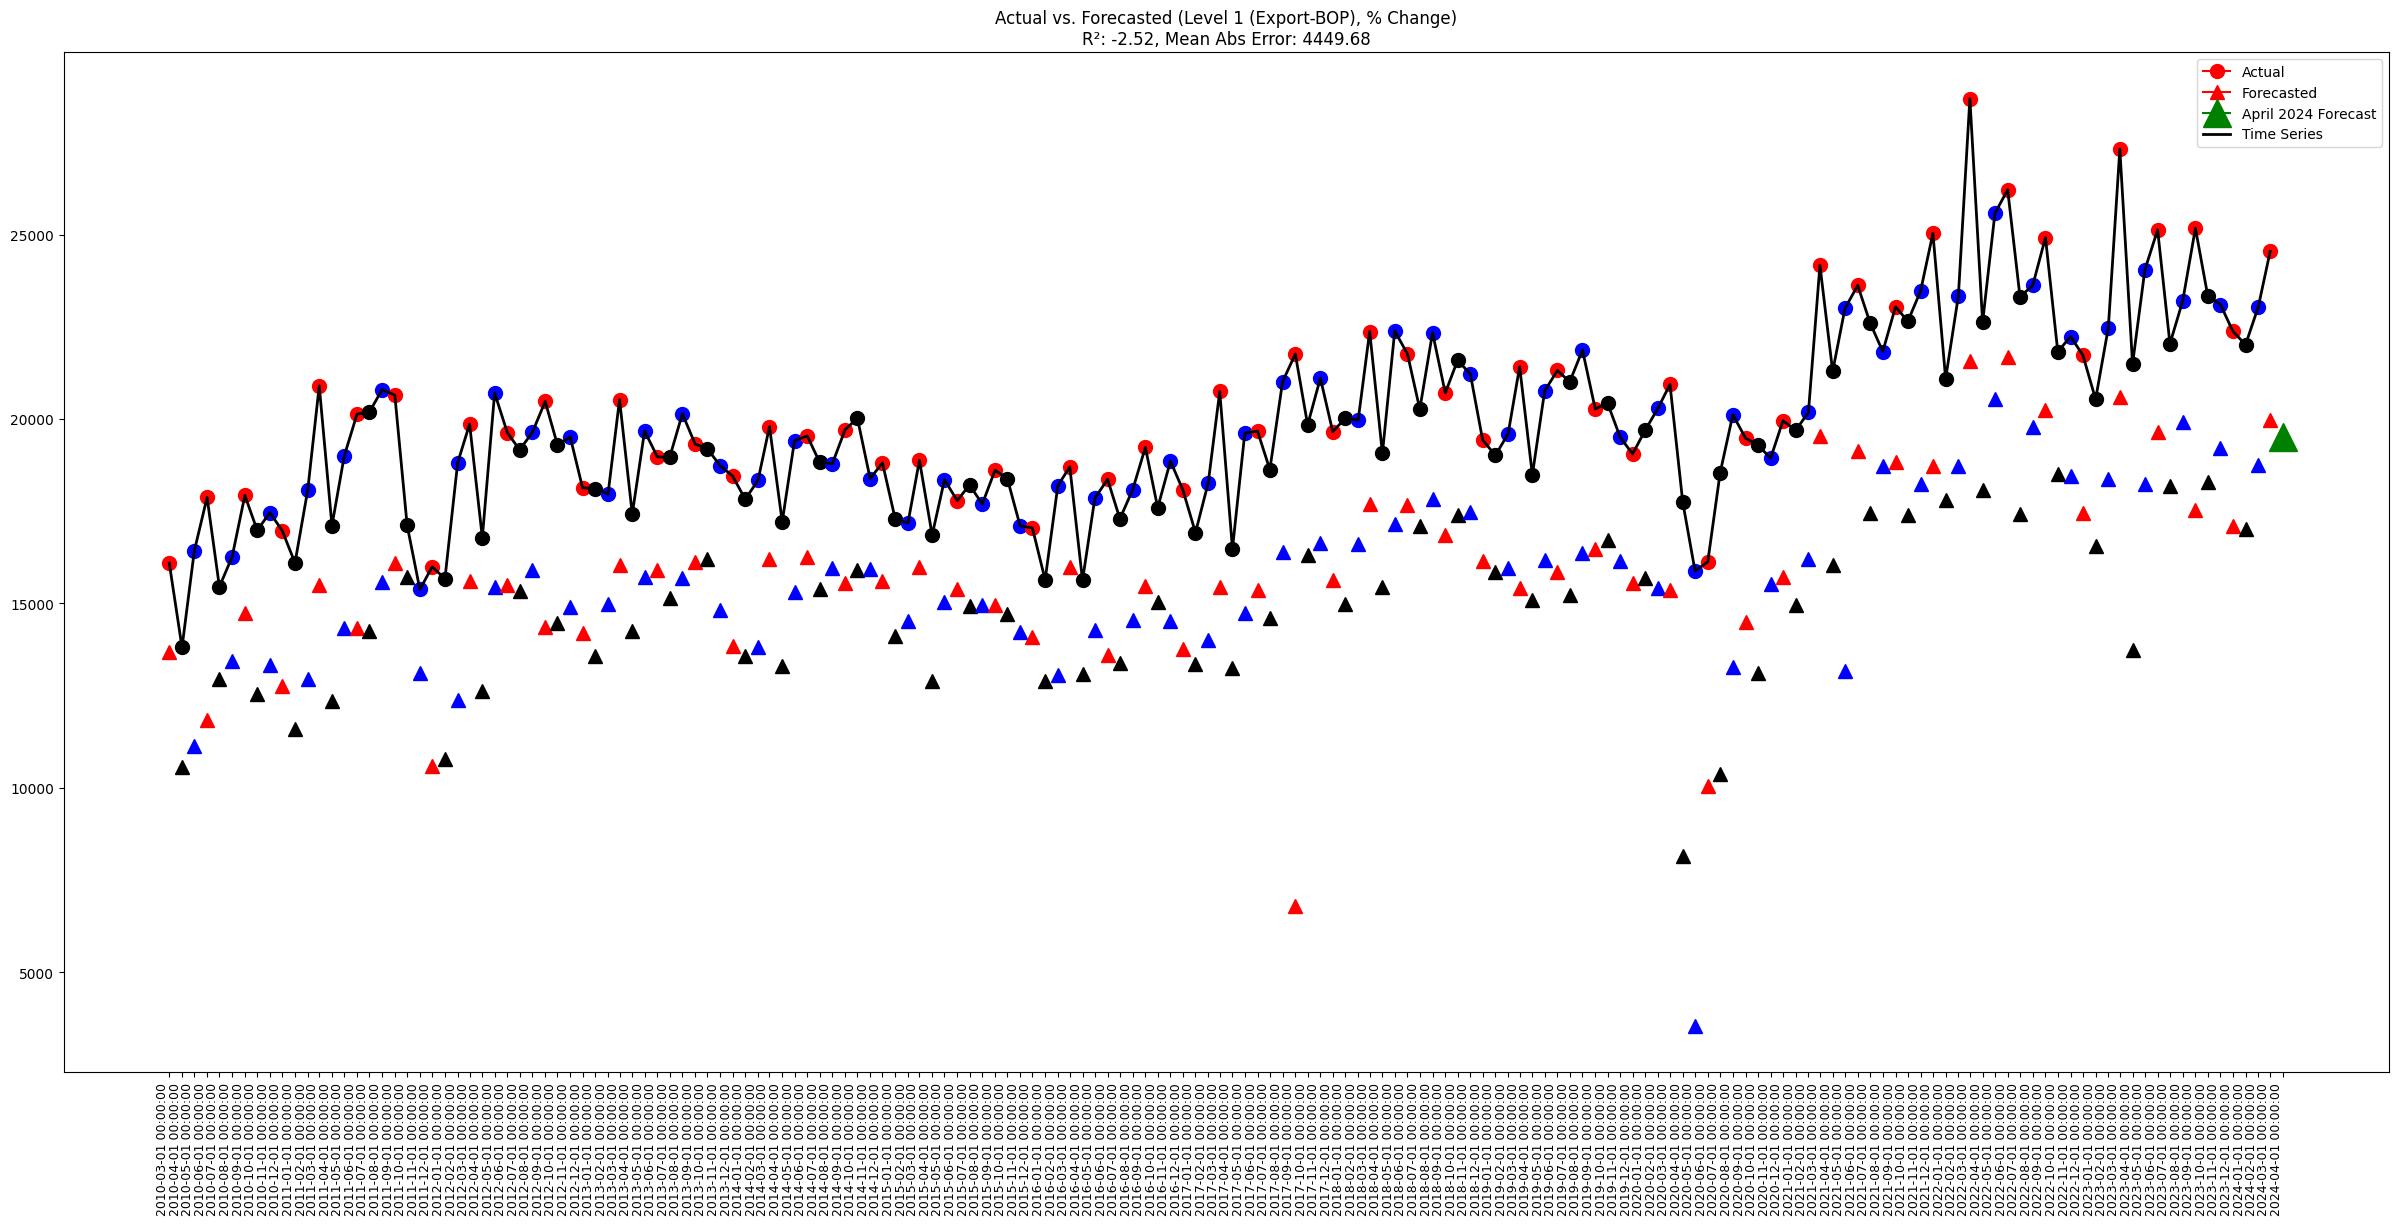

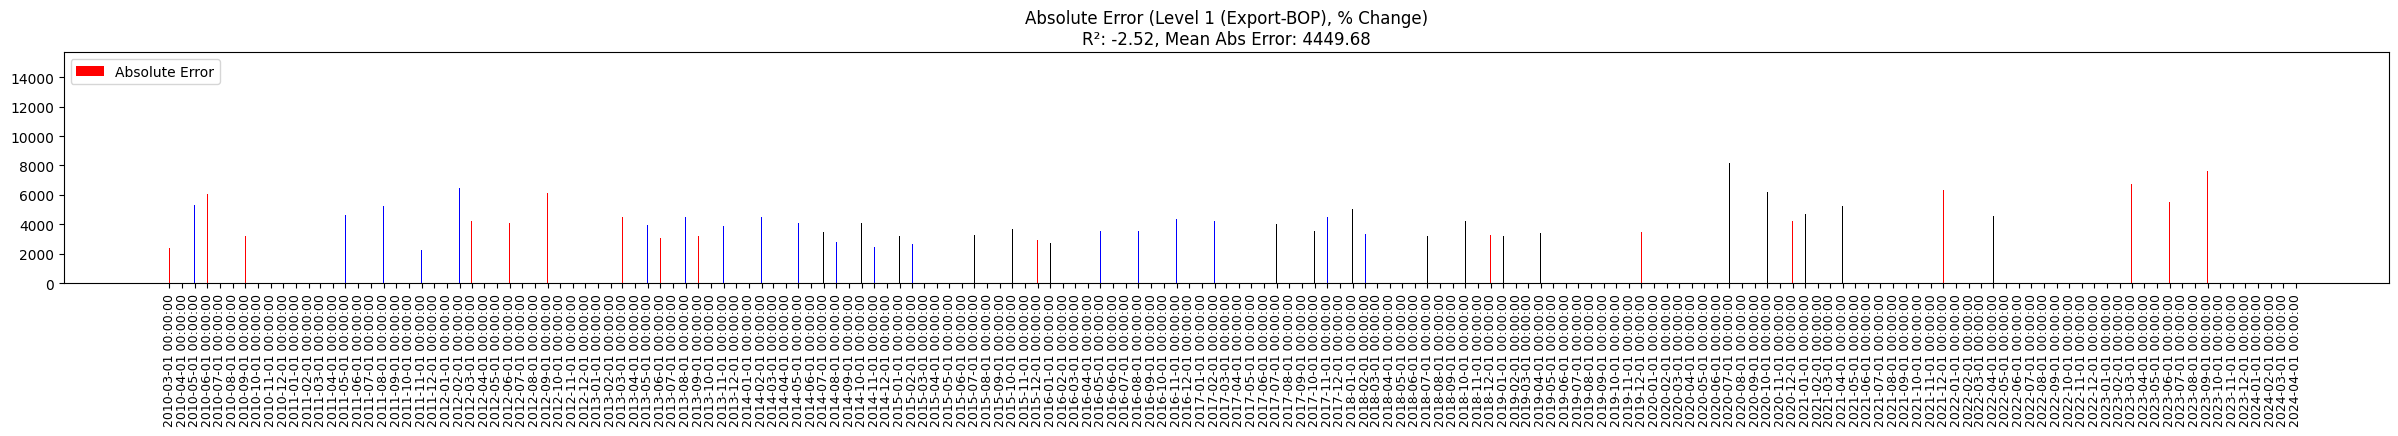

In [10]:
name = "Exports,_f.o.b._(BOP_basis)"

df_Coverage_adj, _ = process_forecast_accuracy(name="Coverage_Adjustment",
                                        plot_show=False)
df_Coverage_adj = df_Coverage_adj["forecast"]

# reindex to the shorter length
if len(df_weighted) > len(df_Coverage_adj):
    df_weighted = df_weighted.reindex(df_Coverage_adj.index)
else:
    df_Coverage_adj = df_Coverage_adj.reindex(df_weighted.index)

df_weighted = df_weighted + df_Coverage_adj

df_actual, _ = process_forecast_accuracy(name=name,
                                        plot_show=False)
df_actual = df_actual["actual"]

# reindex to the shorter length
df_actual = df_actual.reindex(df_weighted.index)

df_accuracy = calculate_accuracy_metrics(actual=df_actual,
                                            forecast=df_weighted)

plot_actual_vs_forecast(df_accuracy=df_accuracy, col_name="Level 1 (Export-BOP)")

## The above is now placed into functions for easier constituent stitching

In [11]:
name2 = "Coverage_Adjustment"
mapper_path = "data/cleaned/MAP_exports_FirstAnalysis.pkl"
weights_path = "data/cleaned/forecasted_weights/dict_R2_cap_extreme_values.pkl"

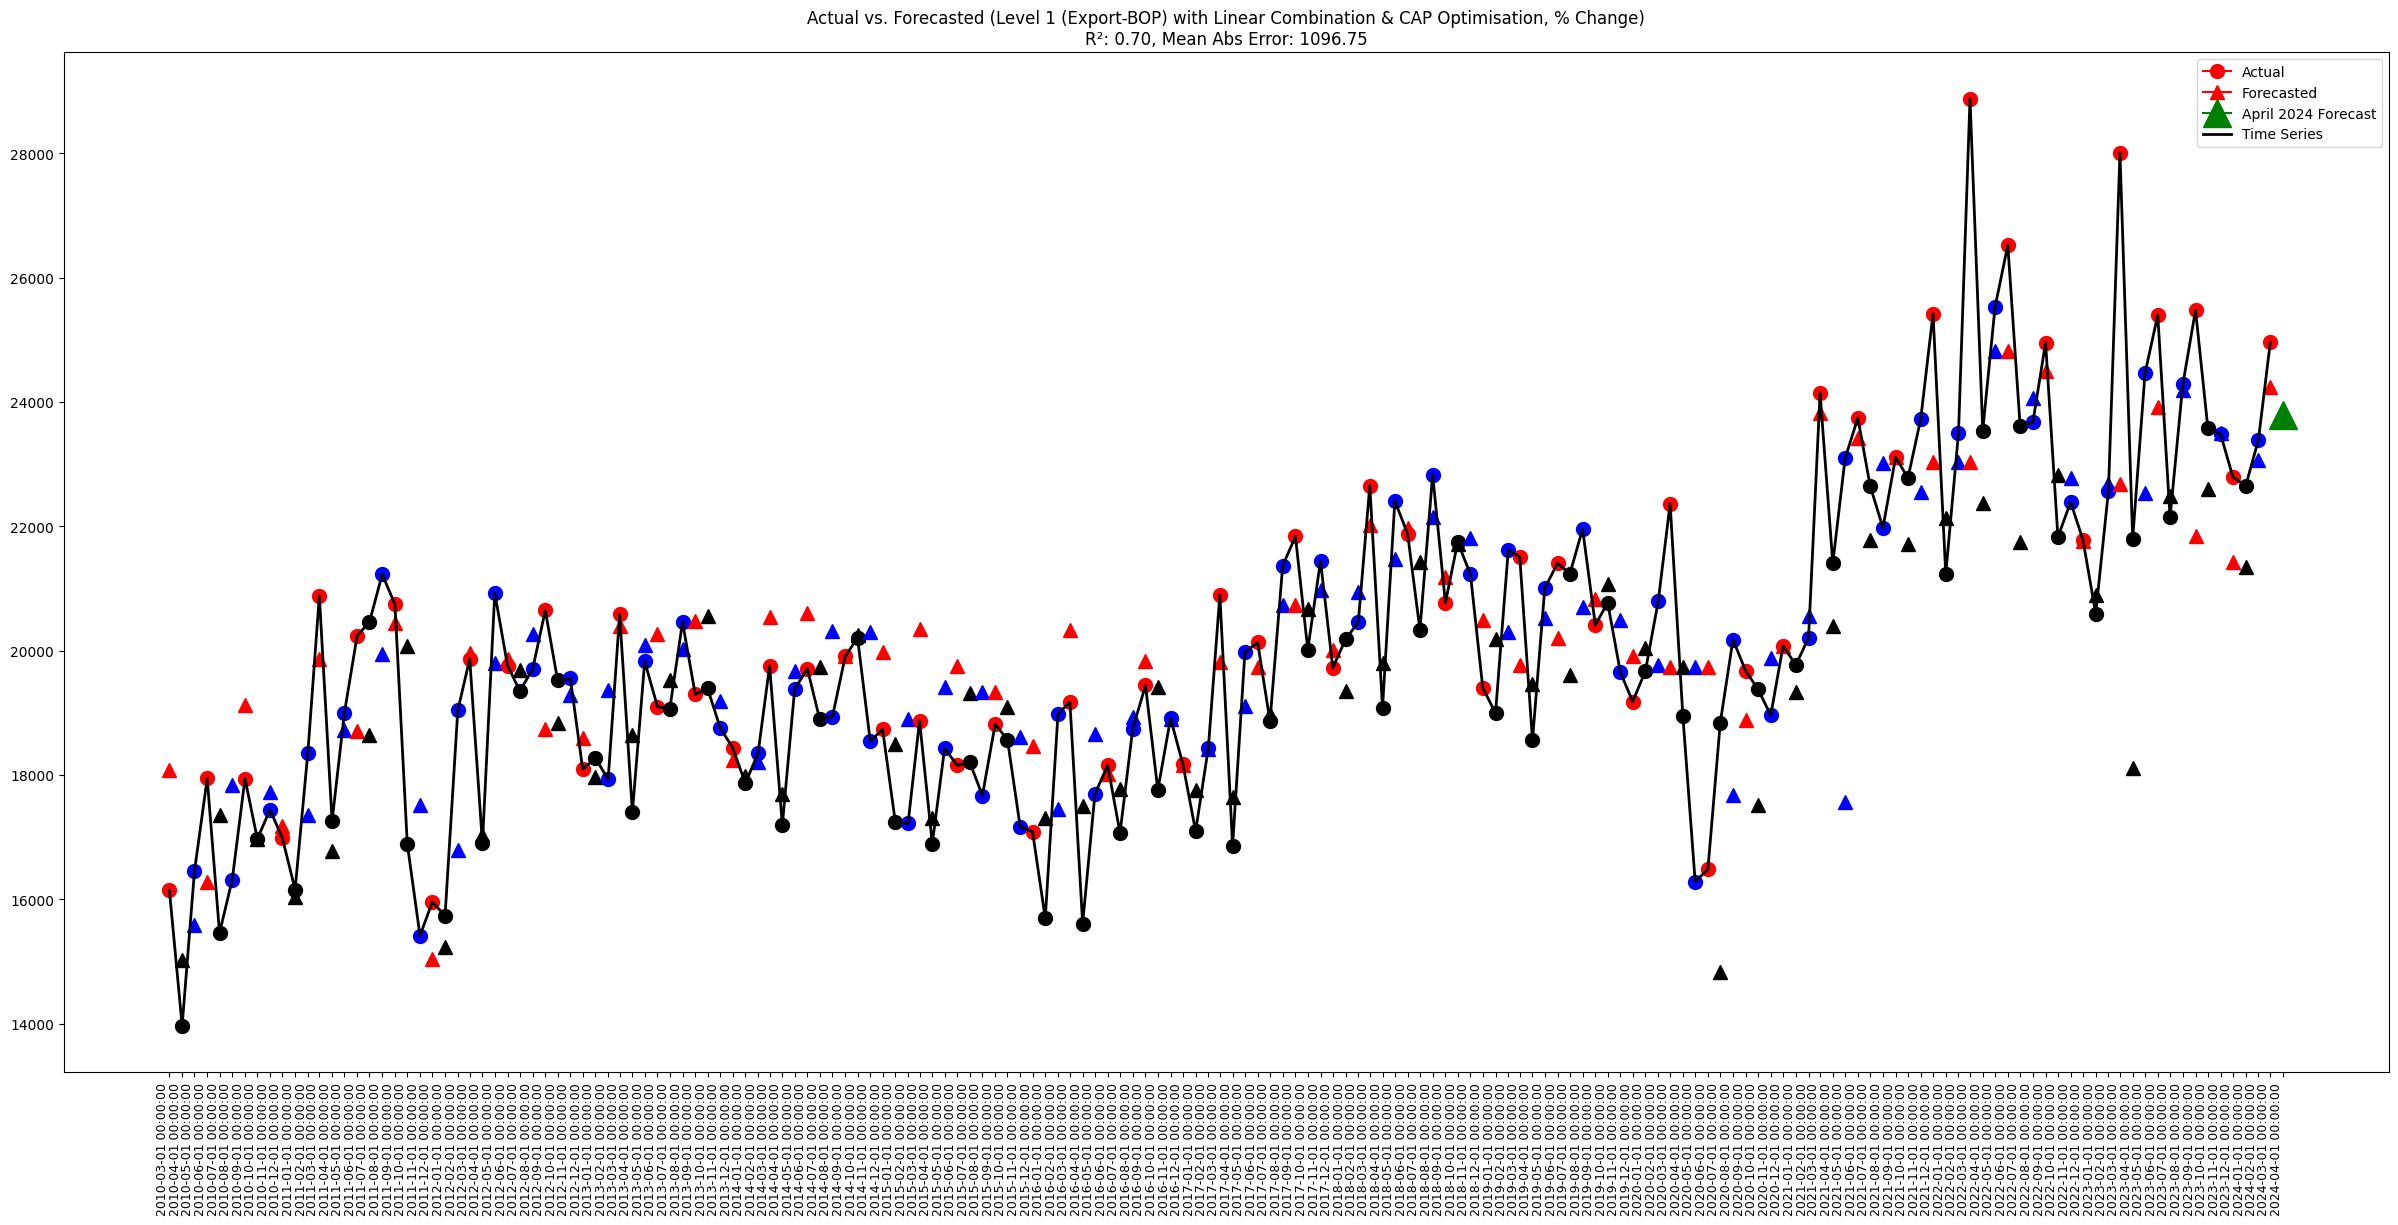

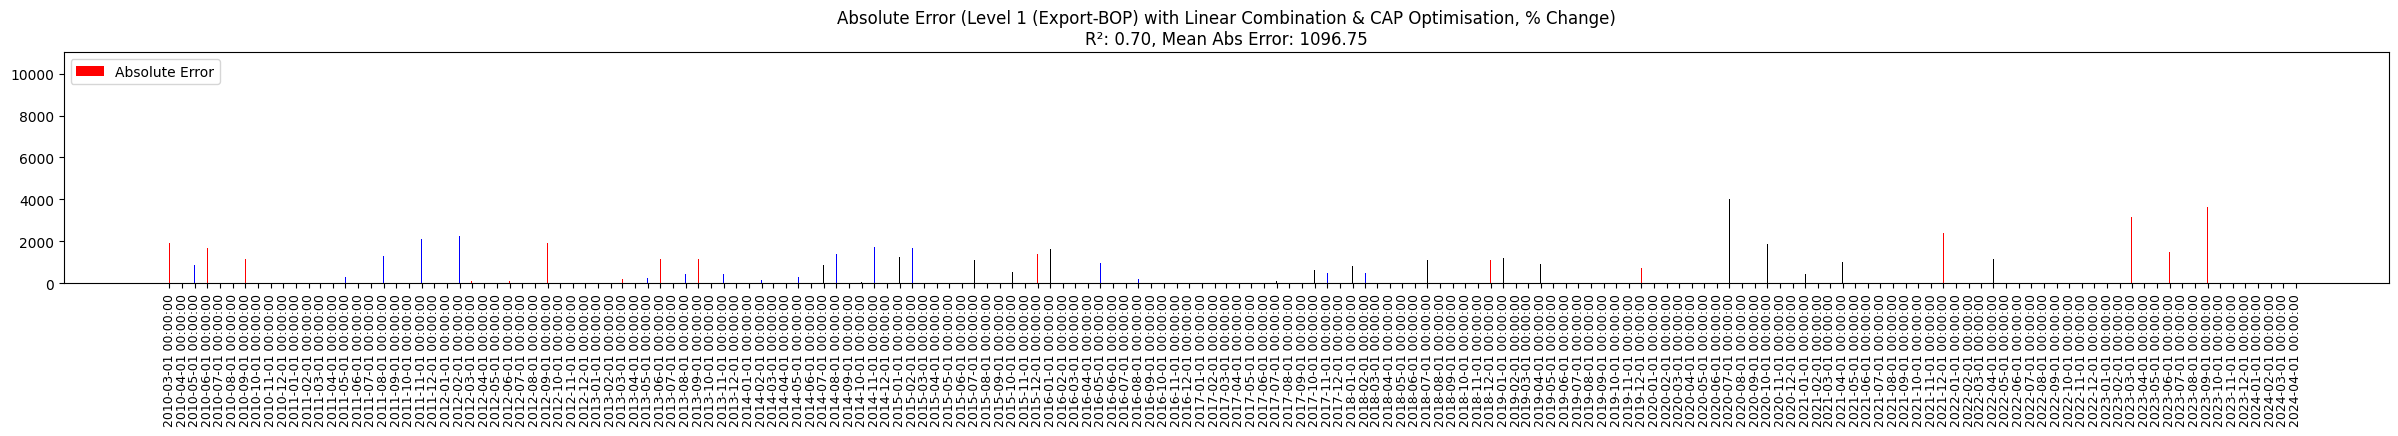

,actual,forecast,error,abs_error,squared_error,abs_percentage_error
2010-03-01,16142.69,18073.227635,-1930.537635,1930.537635,3.726976e+06,0.119592
2010-04-01,13964.05,15024.728189,-1060.678189,1060.678189,1.125038e+06,0.075958
2010-05-01,16447.98,15588.316987,859.663013,859.663013,7.390205e+05,0.052266
2010-06-01,17942.68,16273.782147,1668.897853,1668.897853,2.785220e+06,0.093013
2010-07-01,15456.20,17346.749815,-1890.549815,1890.549815,3.574179e+06,0.122317
...,...,...,...,...,...,...
2023-12-01,22791.55,21426.031065,1365.518935,1365.518935,1.864642e+06,0.059913
2024-01-01,22649.88,21347.662797,1302.217203,1302.217203,1.695770e+06,0.057493
2024-02-01,23384.86,23057.819053,327.040947,327.040947,1.069558e+05,0.013985
2024-03-01,24960.55,24245.115256,715.434744,715.434744,5.118469e+05,0.028663


In [12]:
# with linear combination optimisation
name = "Total_Exports_(Customs_basis)"
df_accuracy = calculate_weighted_forecast(name=name,
                                          mapper_path=mapper_path,
                                          weights_path=weights_path,
                                          plot_show=False)
df_weighted = df_accuracy["forecast"]
df_accuracy_CA = calculate_weighted_forecast_with_coverage_adjustment(name=name,
                                                                   df_weighted=df_weighted,
                                                                   mapper_path=mapper_path,
                                                                   weights_path=weights_path,
                                                                   plot_show=False)
opt_df_accuracy_CA = optimize_forecast(df_accuracy_CA,
                                       plot_show=False)

opt_df_accuracy_CA["forecast"] = cap_extreme_values(opt_df_accuracy_CA[["forecast"]])["forecast"]

plot_actual_vs_forecast(df_accuracy=opt_df_accuracy_CA, 
                        col_name="Level 1 (Export-BOP) with Linear Combination & CAP Optimisation")

display(opt_df_accuracy_CA)
                  

# Level 2 (Custom Basis) : weighted_Sum(weighted_sum_of_components) + Coverage_Adjustment

In [13]:
name = 'Total_Exports_(Customs_basis)'

In [14]:
max_row_names

Agriculture           Lag_1_
Fishery               Lag_1_
Forestry         Exp_Smooth_
Mining                Lag_1_
Manufacturing           DCR_
Other_Exports    Exp_Smooth_
Re-Exports_1     Exp_Smooth_
dtype: object

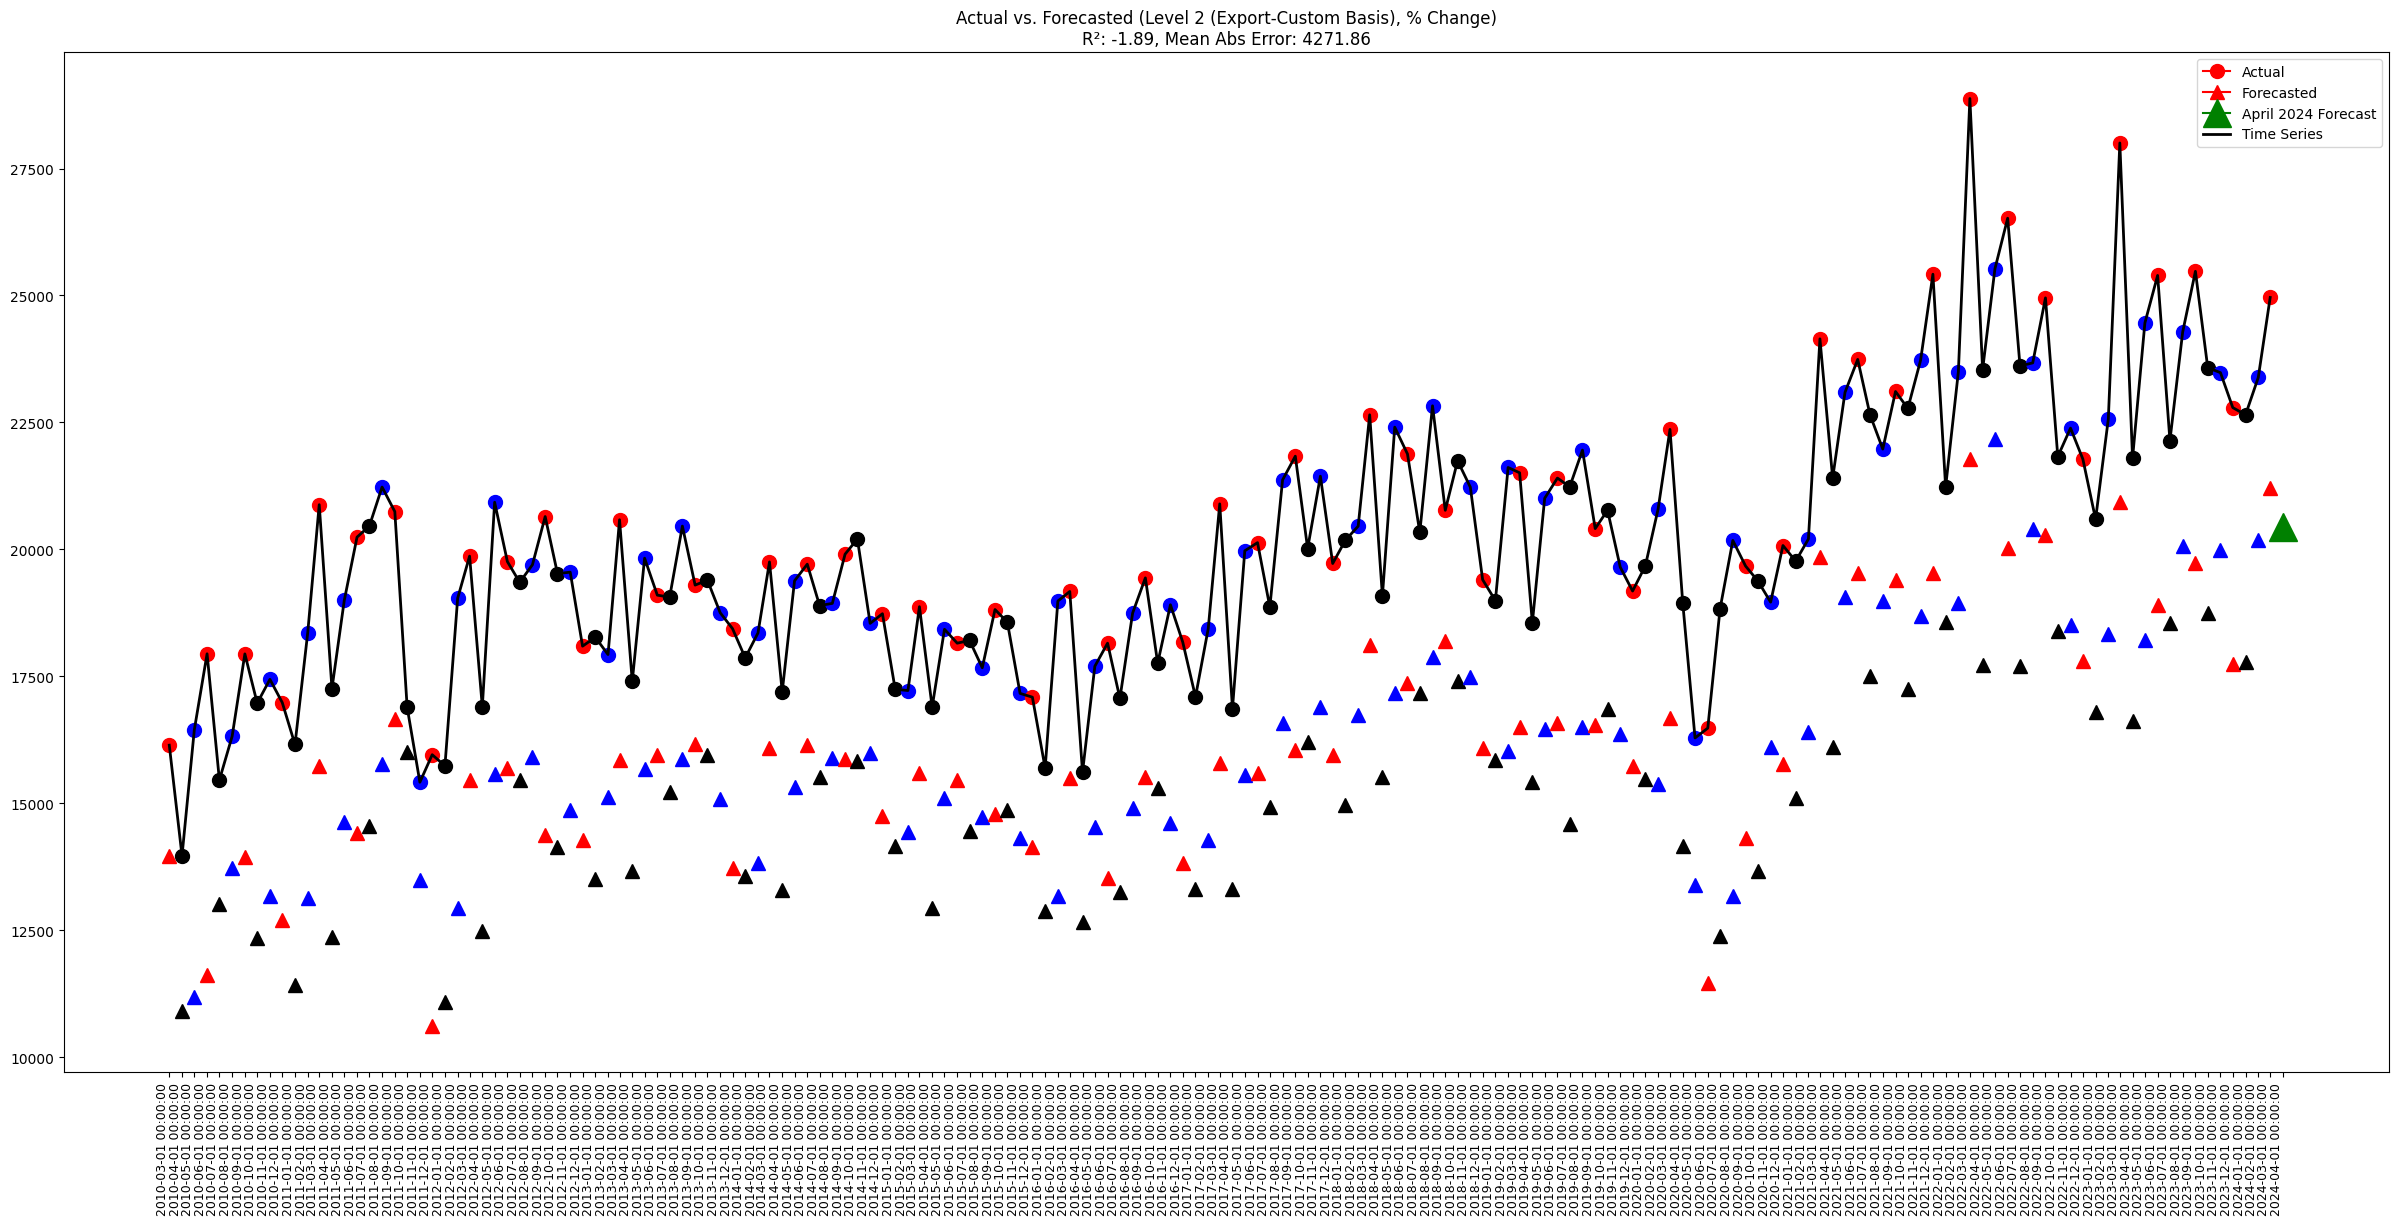

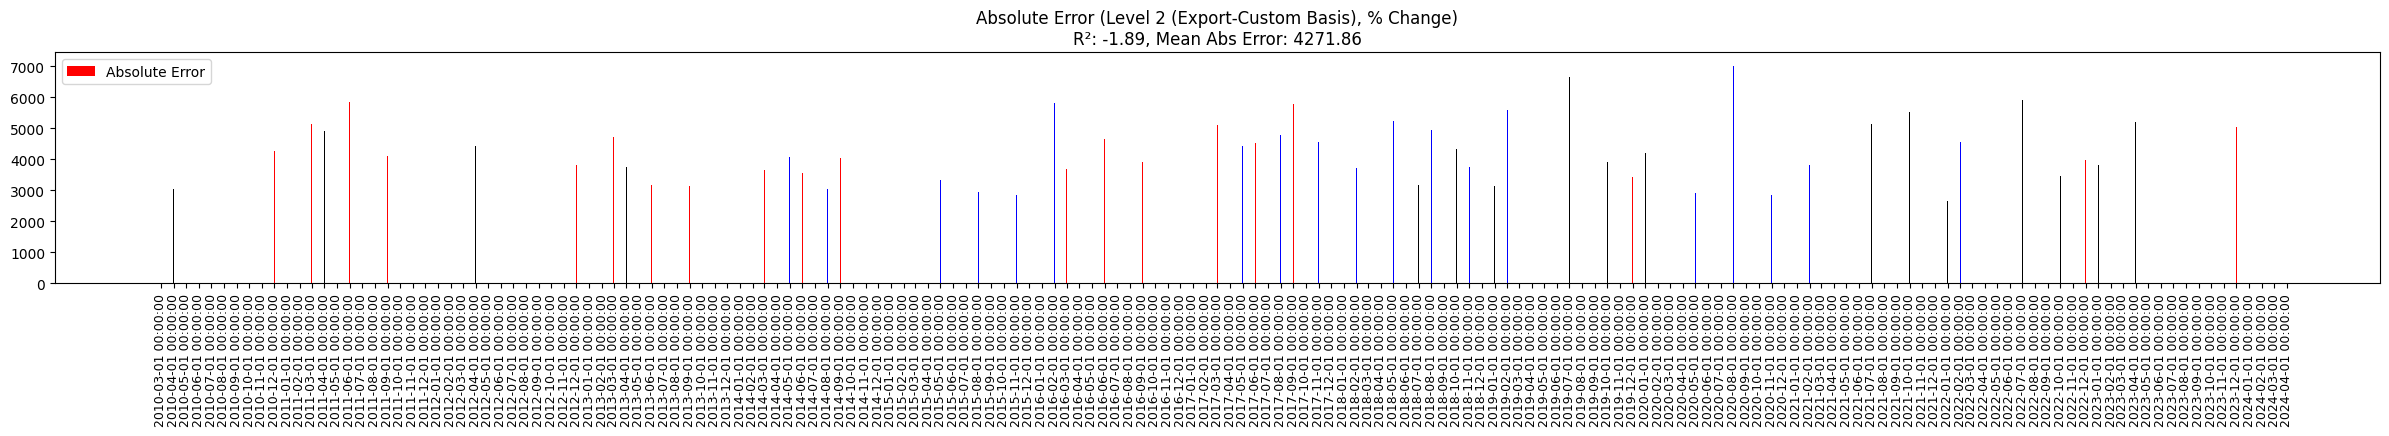

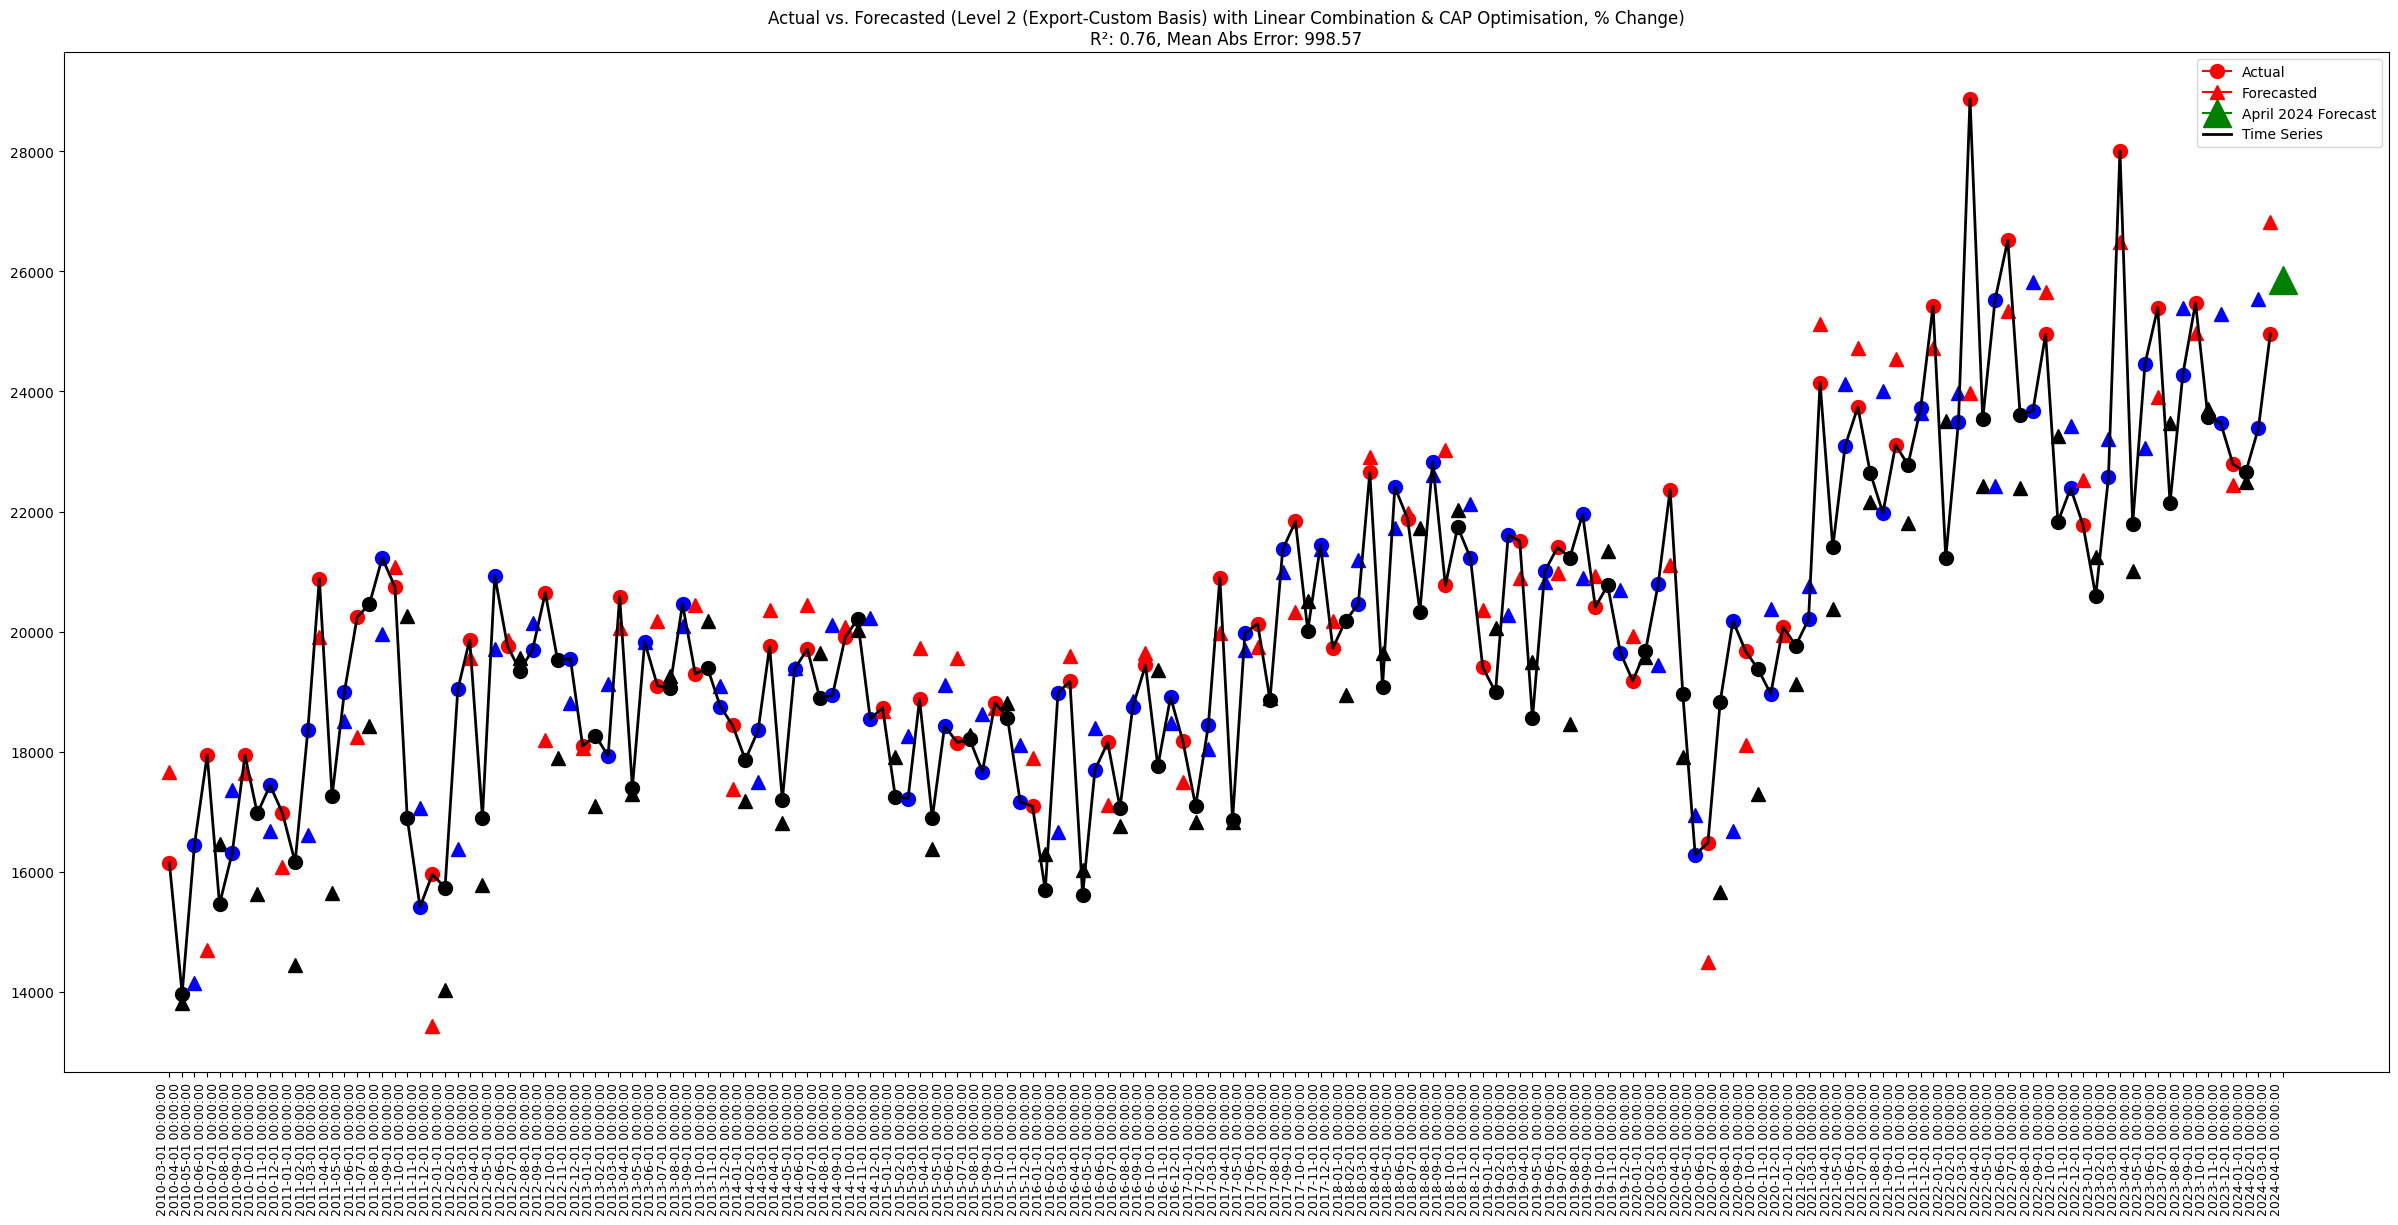

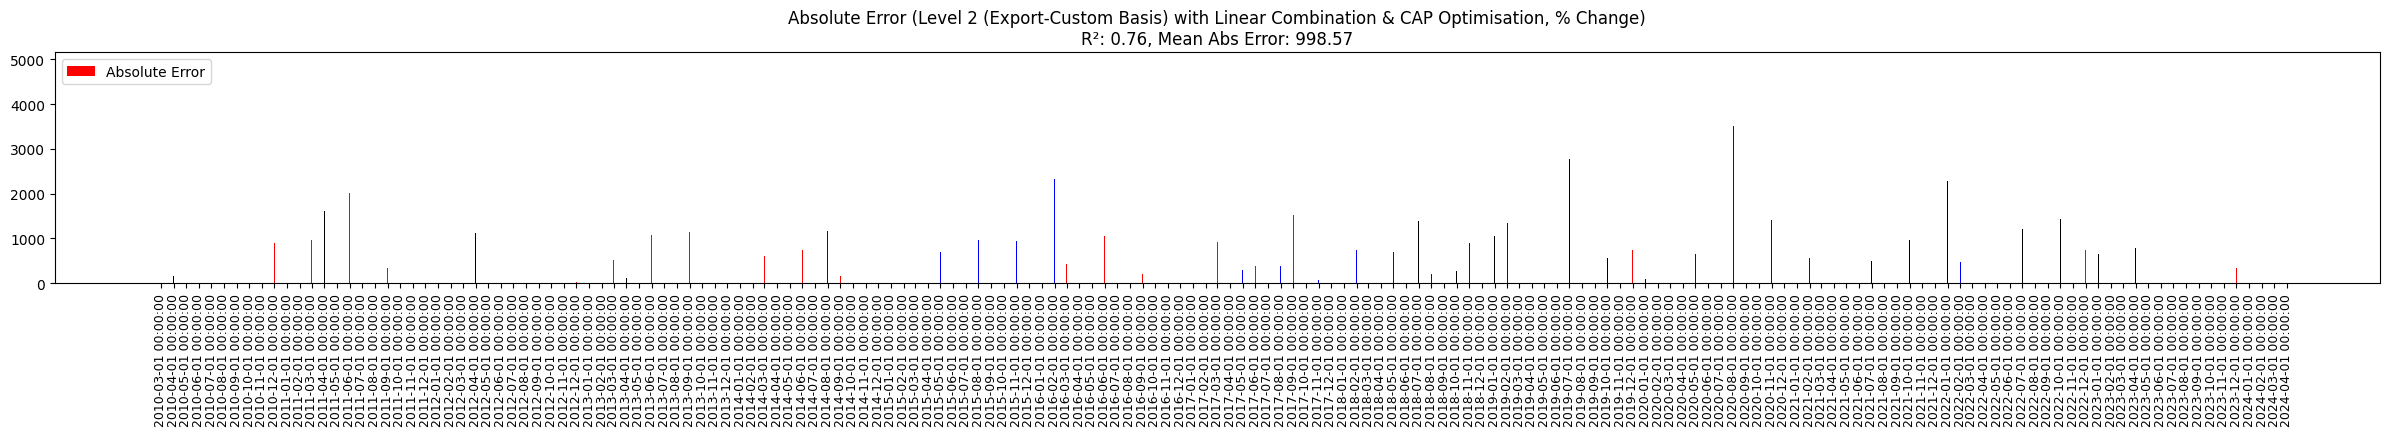

,actual,forecast,error,abs_error,squared_error,abs_percentage_error
2010-03-01,16142.69,17660.116174,-1517.426174,1517.426174,2.302582e+06,0.094001
2010-04-01,13964.05,13812.936386,151.113614,151.113614,2.283532e+04,0.010822
2010-05-01,16447.98,14138.004915,2309.975085,2309.975085,5.335985e+06,0.140441
2010-06-01,17942.68,14688.608134,3254.071866,3254.071866,1.058898e+07,0.181359
2010-07-01,15456.20,16465.638936,-1009.438936,1009.438936,1.018967e+06,0.065310
...,...,...,...,...,...,...
2023-12-01,22791.55,22446.419626,345.130374,345.130374,1.191150e+05,0.015143
2024-01-01,22649.88,22494.782111,155.097889,155.097889,2.405536e+04,0.006848
2024-02-01,23384.86,25538.984843,-2154.124843,2154.124843,4.640254e+06,0.092116
2024-03-01,24960.55,26830.219890,-1869.669890,1869.669890,3.495665e+06,0.074905


In [15]:
df_weighted = pd.DataFrame()

for major_col in mapper.columns[:-1]:
    
    df_accuracy = calculate_weighted_forecast(name=major_col,
                                                mapper_path=mapper_path,
                                                weights_path=weights_path,
                                                plot_show=False)
    forecast = df_accuracy["forecast"]
    with open(weights_path, "rb") as f:
        weights_r2 = pickle.load(f)[name]
    max_row_names = weights_r2.idxmax()
    weight_technique_name_map = {"Lag-1": "Lag_1_", "Exp Smooth": "Exp_Smooth_", "DCR": "DCR_"}
    max_row_names = max_row_names.map(weight_technique_name_map)
    best_r2 = max_row_names[major_col]
    w = convert_period_index_to_datetime(pd.read_pickle(f"data/cleaned/forecasted_weights/{best_r2}{name}.pkl")[major_col])
    
    if len(w) > len(forecast):
        w = w.reindex(forecast.index)
    else:
        forecast = forecast.reindex(w.index)

    df_weighted[major_col] = forecast * w
    
df_weighted = df_weighted.dropna().sum(axis=1).dropna()
df_actual, _ = process_forecast_accuracy(name=name, plot_show=False)
df_actual = df_actual["actual"]
df_actual = df_actual.reindex(df_weighted.index)
df_accuracy = calculate_accuracy_metrics(actual=df_actual, forecast=df_weighted)
# display(df_accuracy)
plot_actual_vs_forecast(df_accuracy=df_accuracy, col_name="Level 2 (Export-Custom Basis)")


#with Linear Optimisation and CAP Adjustment
df_accuracy["forecast"] = cap_extreme_values(df_accuracy[["forecast"]])["forecast"]
df_accuracy_CA = optimize_forecast(df_accuracy=df_accuracy,
                                   plot_show=True,
                                   col_name="Level 2 (Export-Custom Basis) with Linear Combination & CAP Optimisation")
display(df_accuracy_CA)

# Level 2 (Export-BOP) : weighted_Sum(weighted_sum_of_components) + Coverage_Adjustment

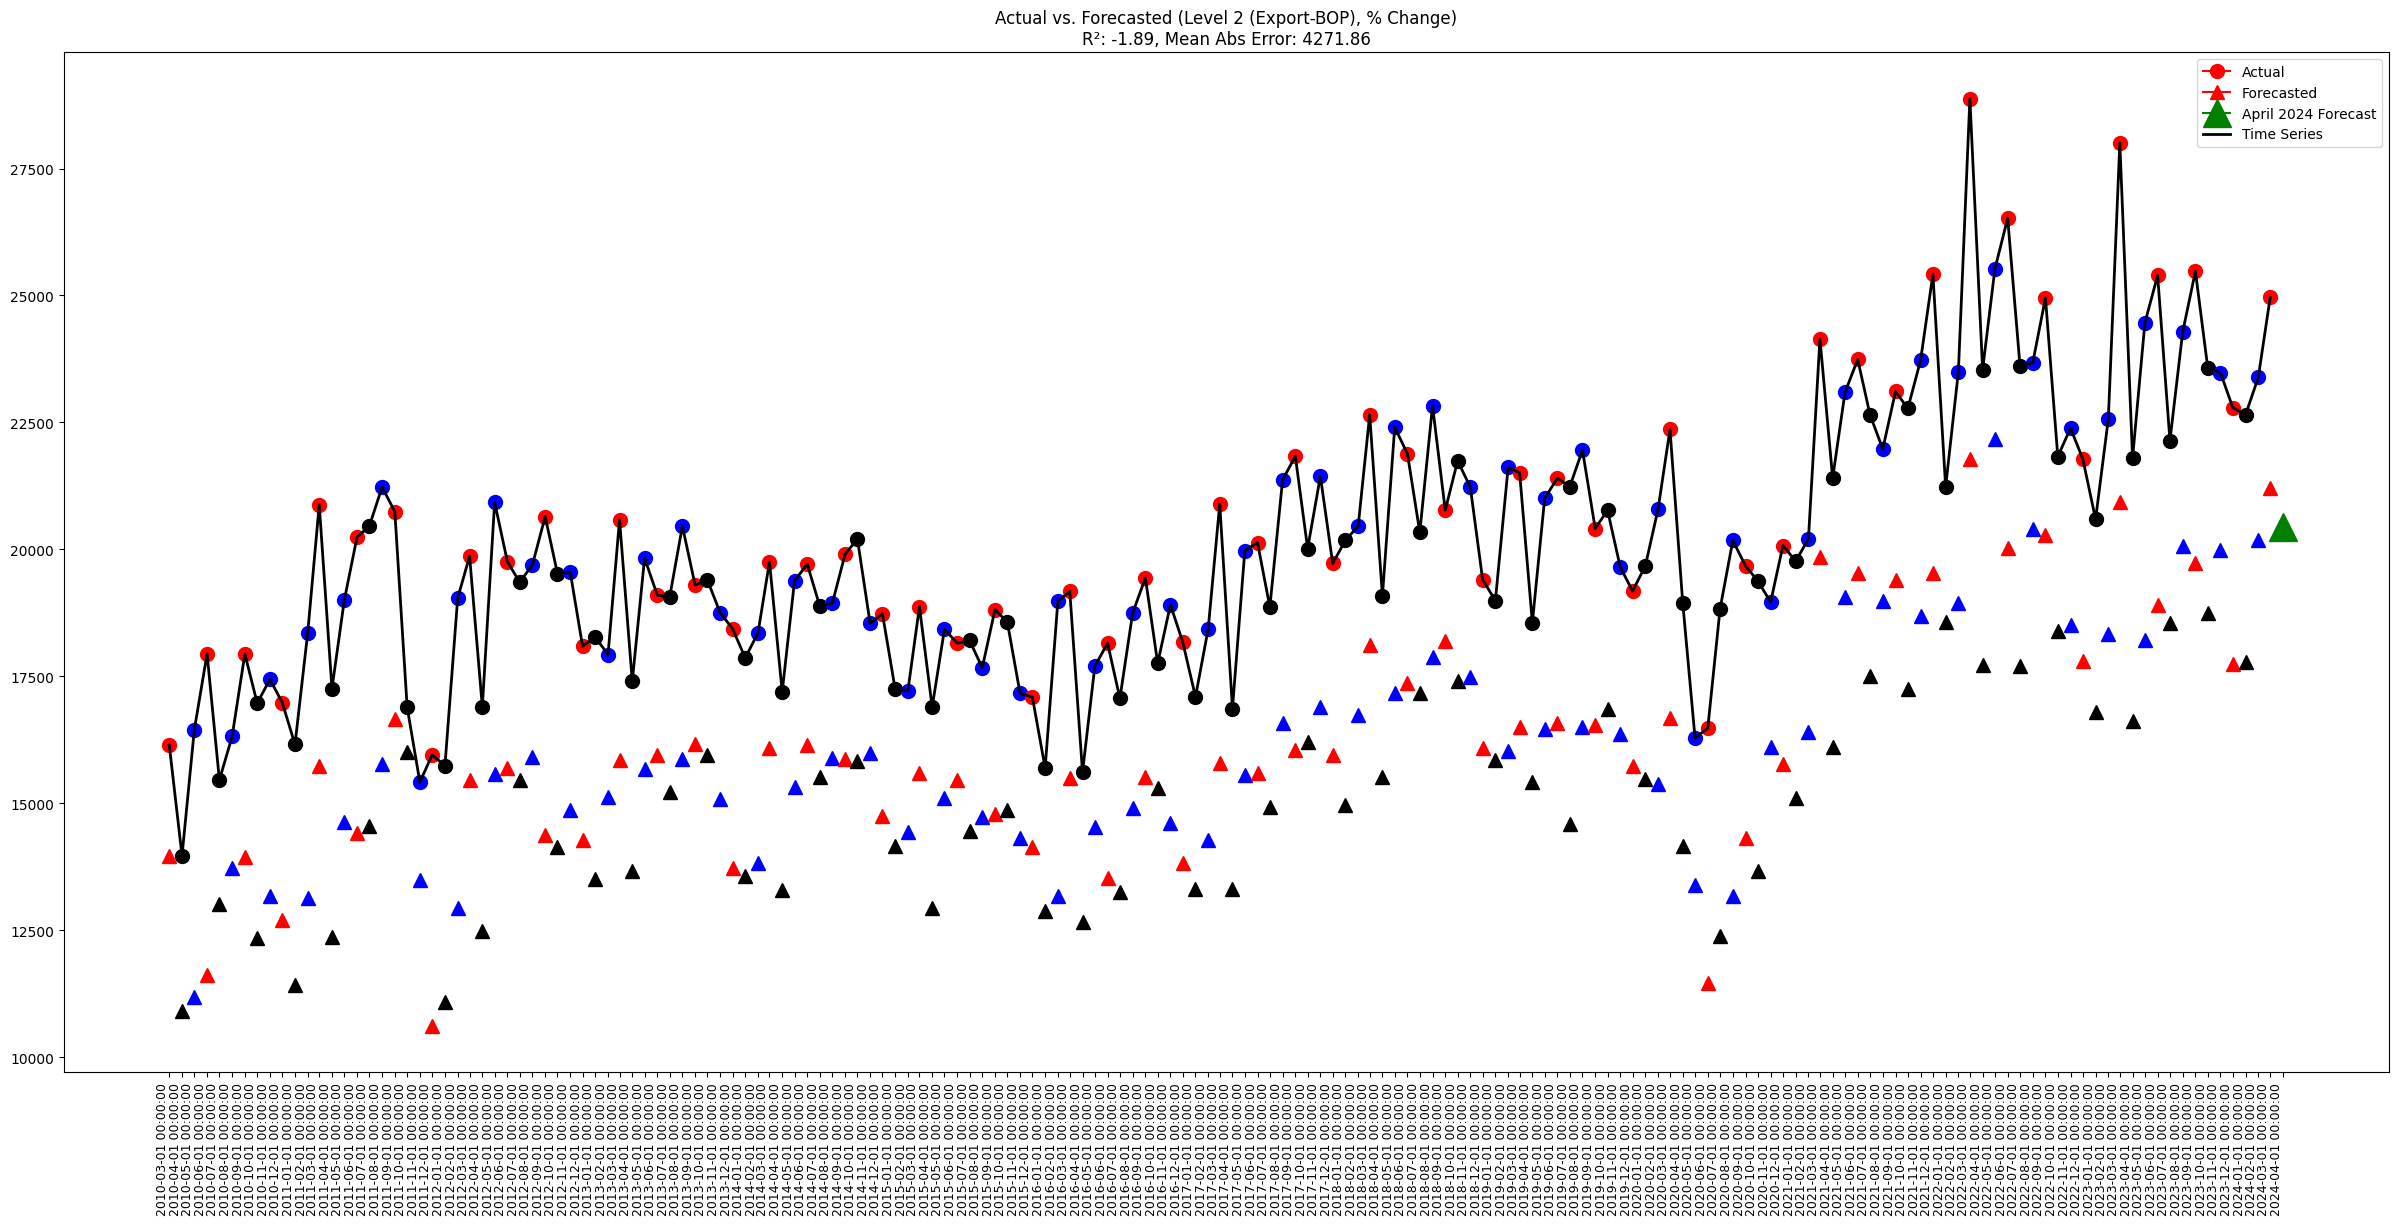

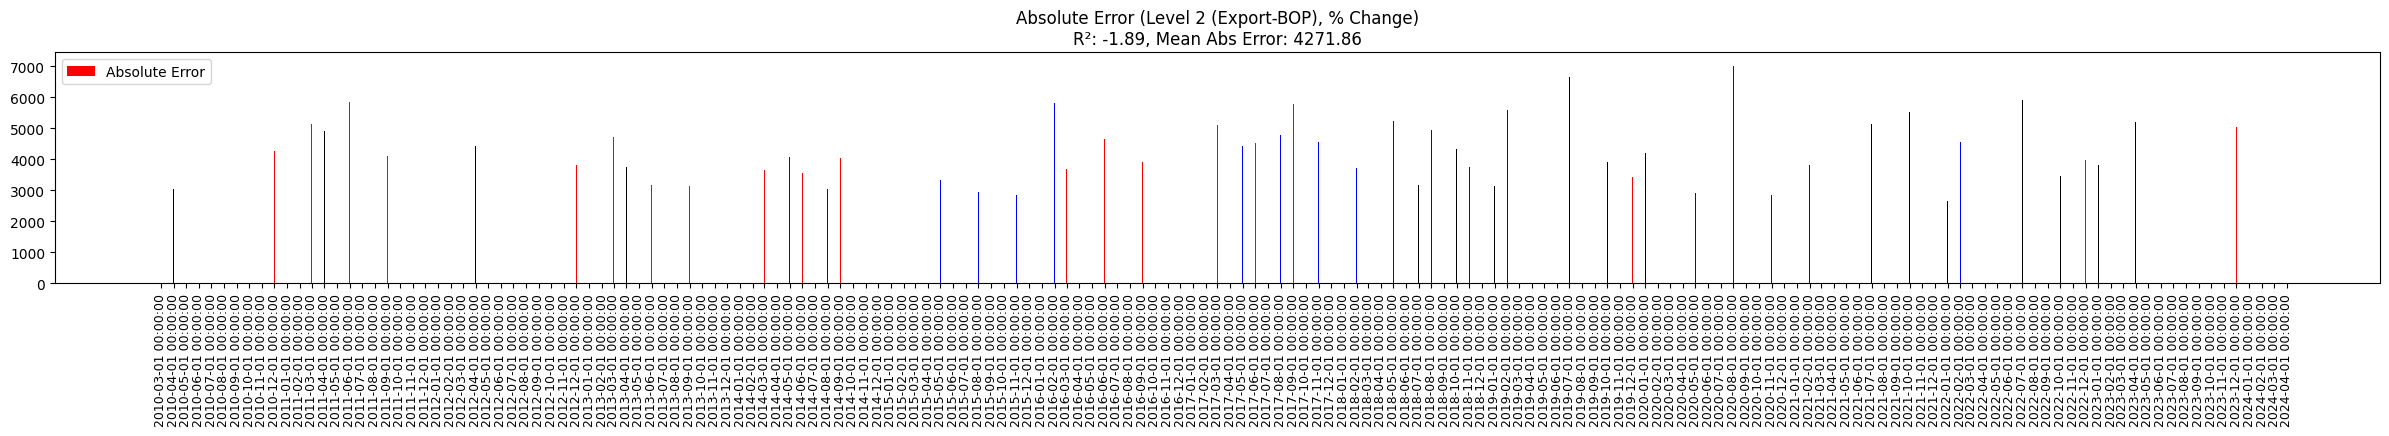

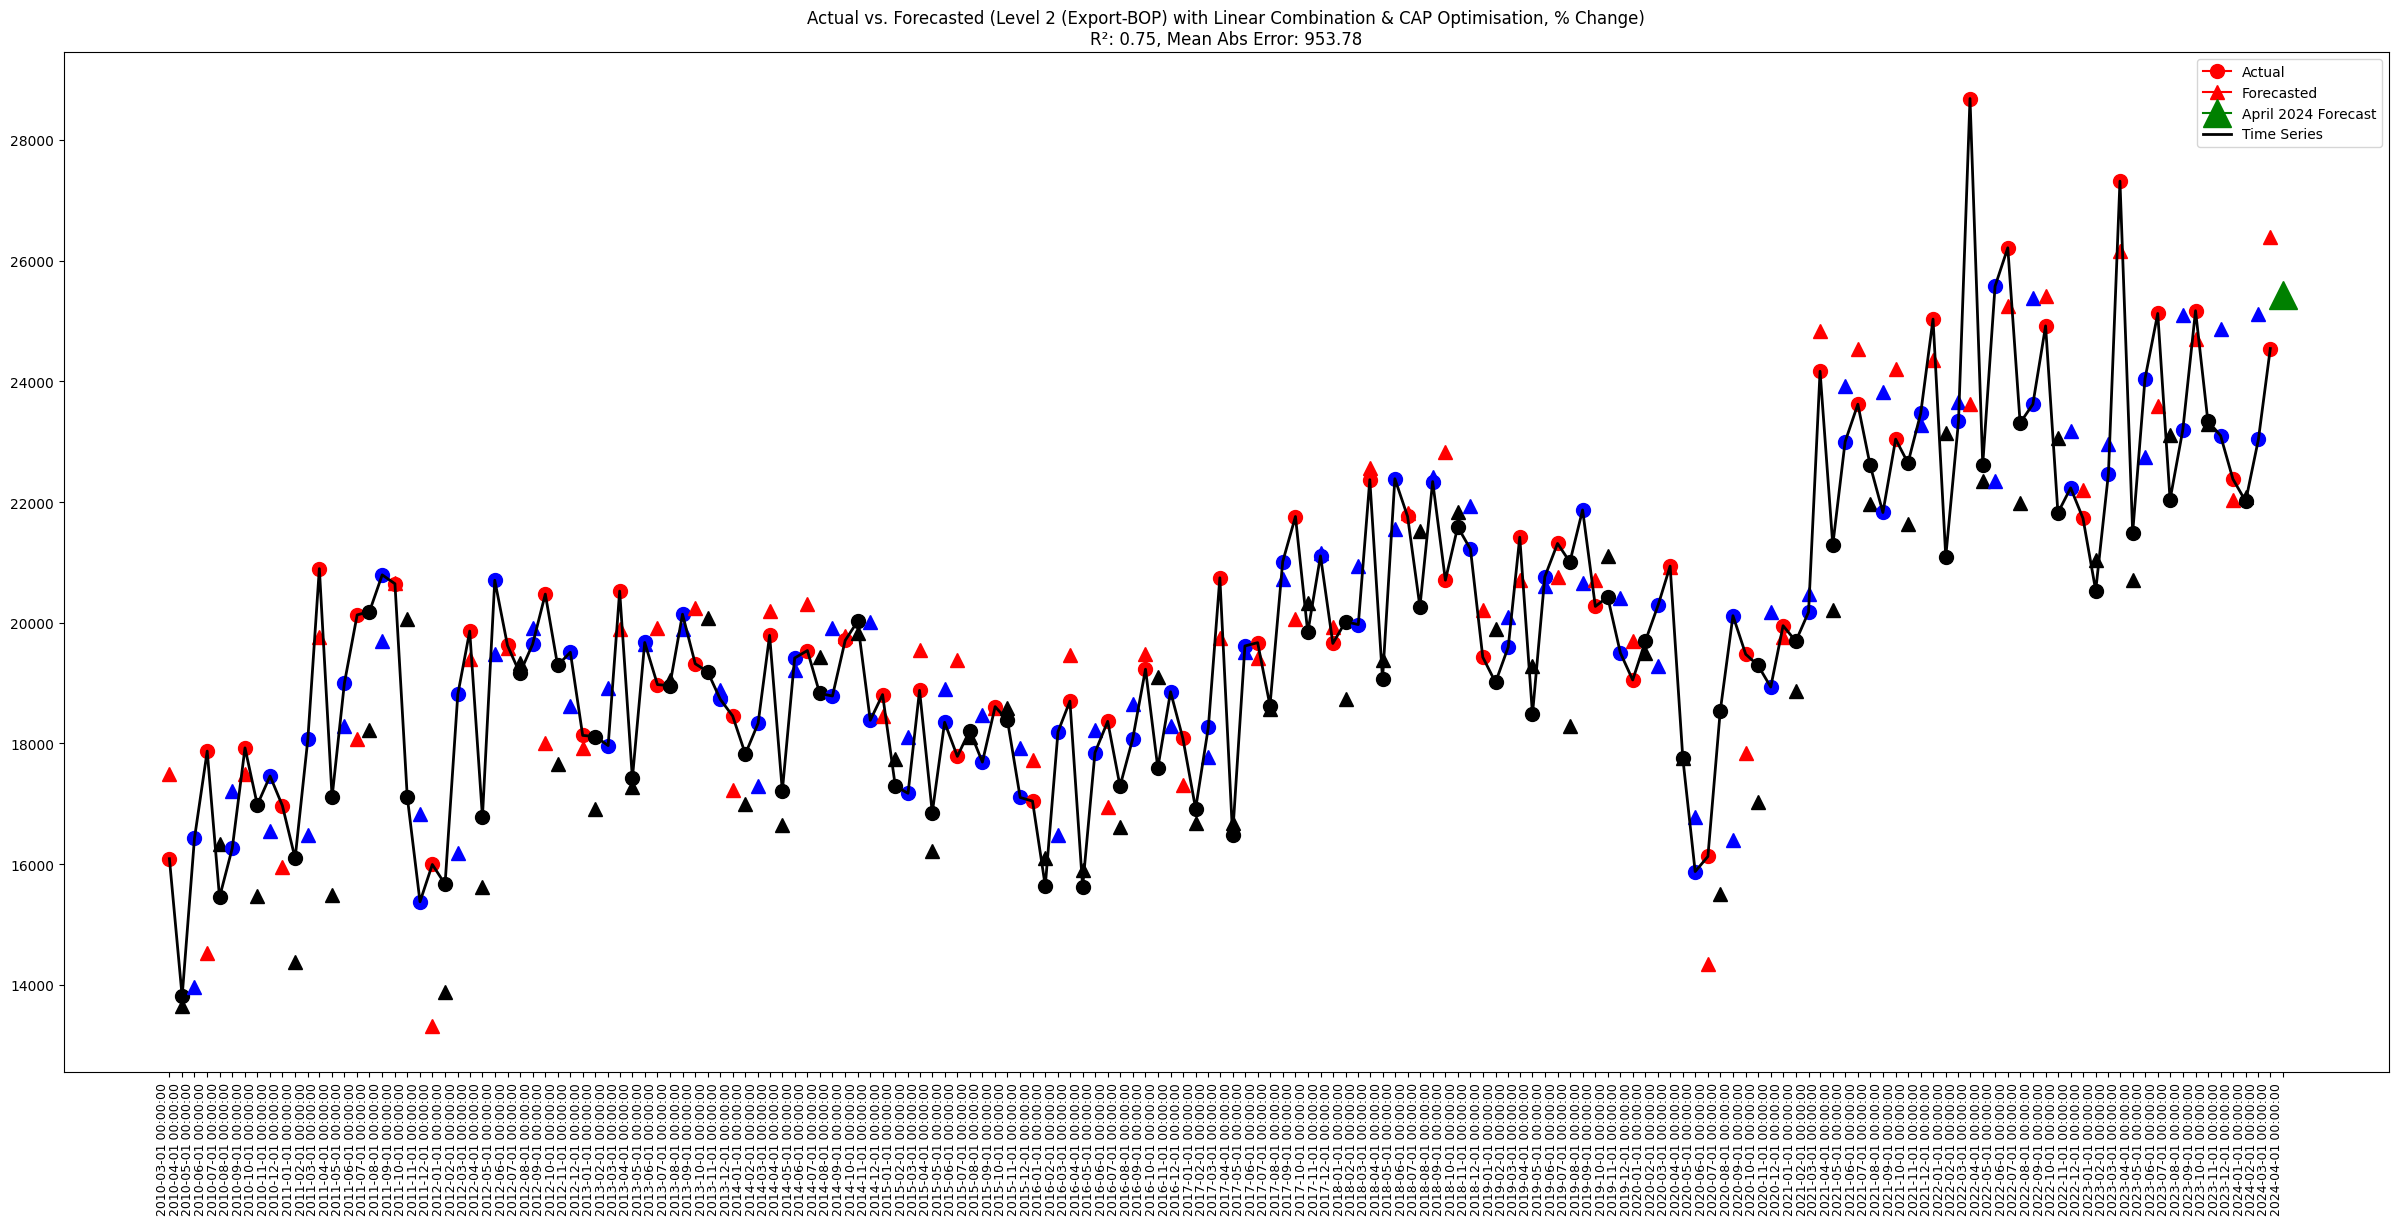

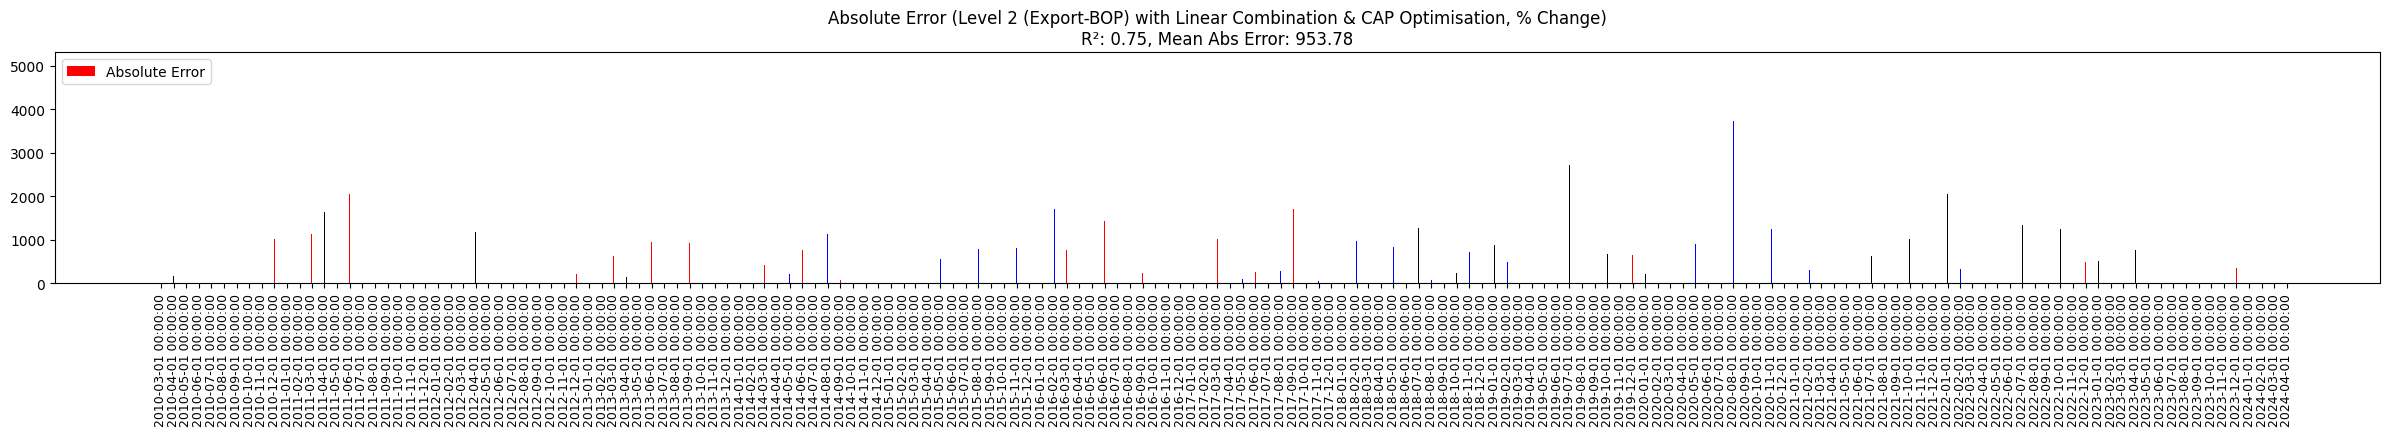

,actual,forecast,error,abs_error,squared_error,abs_percentage_error
2010-03-01,16088.22,17495.763580,-1407.543580,1407.543580,1.981179e+06,0.087489
2010-04-01,13804.62,13640.445631,164.174369,164.174369,2.695322e+04,0.011893
2010-05-01,16424.34,13954.519382,2469.820618,2469.820618,6.100014e+06,0.150376
2010-06-01,17871.67,14519.186492,3352.483508,3352.483508,1.123915e+07,0.187586
2010-07-01,15447.94,16325.733039,-877.793039,877.793039,7.705206e+05,0.056823
...,...,...,...,...,...,...
2023-12-01,22380.30,22034.010002,346.289998,346.289998,1.199168e+05,0.015473
2024-01-01,22012.20,22082.117495,-69.917495,69.917495,4.888456e+03,0.003176
2024-02-01,23036.45,25110.269597,-2073.819597,2073.819597,4.300728e+06,0.090023
2024-03-01,24543.84,26394.696576,-1850.856576,1850.856576,3.425670e+06,0.075410


In [16]:
df_weighted = pd.DataFrame()

for major_col in mapper.columns[:-1]:
    
    df_accuracy = calculate_weighted_forecast(name=major_col,
                                                mapper_path=mapper_path,
                                                weights_path=weights_path,
                                                plot_show=False)
    forecast = df_accuracy["forecast"]
    with open(weights_path, "rb") as f:
        weights_r2 = pickle.load(f)[name]
    max_row_names = weights_r2.idxmax()
    weight_technique_name_map = {"Lag-1": "Lag_1_", "Exp Smooth": "Exp_Smooth_", "DCR": "DCR_"}
    max_row_names = max_row_names.map(weight_technique_name_map)
    best_r2 = max_row_names[major_col]
    w = convert_period_index_to_datetime(pd.read_pickle(f"data/cleaned/forecasted_weights/{best_r2}{name}.pkl")[major_col])
    
    if len(w) > len(forecast):
        w = w.reindex(forecast.index)
    else:
        forecast = forecast.reindex(w.index)

    df_weighted[major_col] = forecast * w
    
df_weighted = df_weighted.dropna().sum(axis=1).dropna()
df_actual, _ = process_forecast_accuracy(name=name, plot_show=False)
df_actual = df_actual["actual"]
df_actual = df_actual.reindex(df_weighted.index)
df_accuracy = calculate_accuracy_metrics(actual=df_actual, forecast=df_weighted)
plot_actual_vs_forecast(df_accuracy=df_accuracy, col_name="Level 2 (Export-BOP)")


#with Linear Optimisation and CAP Adjustment
df_accuracy["forecast"] = cap_extreme_values(df_accuracy[["forecast"]])["forecast"]
df_accuracy_CA = optimize_forecast(df_accuracy=df_accuracy,
                                   plot_show=False,
                                   col_name="Level 2 (Custom Basis) with Linear Combination & CAP Optimisation")

df_Coverage_adj, _ = process_forecast_accuracy(name="Coverage_Adjustment",
                                        plot_show=False)
df_Coverage_adj["forecast"] = cap_extreme_values(df_Coverage_adj[["forecast"]])["forecast"]
df_Coverage_adj = optimize_forecast(df_Coverage_adj,
                                    plot_show=False,
                                    col_name="Level 2 (Total Export-BOP) with Linear Combination & CAP Optimisation")

df_actual, _ = process_forecast_accuracy(name="Exports,_f.o.b._(BOP_basis)",
                                        plot_show=False)

df_actual["forecast"] = df_accuracy_CA["forecast"] + df_Coverage_adj["forecast"]
df_actual["forecast"] = cap_extreme_values(df_actual[["forecast"]])["forecast"]
df_actual = optimize_forecast(df_actual,
                              plot_show=True,
                                col_name="Level 2 (Export-BOP) with Linear Combination & CAP Optimisation")
display(df_actual)